# **패스트푸드 매장 분포 분석**

***
**뉴스기사**
- ["매장수 1331 대 436, 롯데리아와 맥도날드의 '반전 매출'"](http://www.bizhankook.com/bk/article/14713)
- ["맥도날드, 20년 된 신촌점 철수… 핵심상권 떠난다"](https://www.hankyung.com/economy/article/2018031330041)
- ["맥도날드가 사라지는 이유"](https://www.sedaily.com/NewsVIew/1RZE00DFX6)
- [롯데리아·맥도날드 "아 옛날이여"…맘스터치·버거킹 "파죽지세"](https://www.asiae.co.kr/article/2019052210574919230)
- ["버거킹, 月 4개 이상 오픈… 상반기 맥도날드 매장수 넘을 듯"](http://biz.newdaily.co.kr/site/data/html/2020/02/19/2020021900063.html)

***
**같이 확인해볼 질문**
1. 맥도날드 매장 수는 계속 줄어들고 있을까?
2. 버거킹은 맥도날드를 매장수에서 이겼을까?
3. 패스트푸드 매장은 어느 지역에 많이 분포할까?

*** 
**사용데이터**  
[상가정보 데이터셋 - 2015년 12월 ~ 2019년 12월](https://www.data.go.kr/dataset/15012005/fileData.do)
- 상가(상권)정보_201912
- 소상공인시장진흥공단_상가업소정보_201812
- 상가업소정보(2017년 12월)
- 상가업소정보 (2016년 12월)
- 상가업소정보 (2015년 12월) 

***
**Google Colab 사용 설정**  
- [Google Colab 사용하기](https://zzsza.github.io/data/2018/08/30/google-colab/)
- [Google Colab 사용법](https://datascienceschool.net/view-notebook/f9d9fddb7cc7494a9e4be99f0e137be0/)


In [0]:
# 구글 드라이브와 Colab 연동
# 마운트가 해제되었다면, 다시 실행해주세요
# 자세한 내용은 위에 정리해둔 페이지를 참고해주세요

from google.colab import auth
auth.authenticate_user()

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
# 내 구글드라이브와 연동되었다면 데이터를 저장해놓은 경로를 지정해줍니다.

dir = './gdrive/My Drive/00.Colab Notebooks/fastcampus/패스트푸드 매장 분포 분석/data/'

***
## **파이썬 라이브러리 로드**

In [0]:
# 경고메세지 제거
import warnings
warnings.filterwarnings('ignore')

In [0]:
# library import
import numpy as np
import pandas as pd
import glob

In [0]:
# 시각화 library import
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from plotnine import * #ggplot
import folium #지도시각화

**(참고) 한글폰트 사용하기**
- [matplotlib 한글폰트 사용하기](http://corazzon.github.io/matplotlib_font_setting)
- [google colab 한글폰트 사용하기](https://colab.research.google.com/github/nicewook/datascience_exercise/blob/master/korean_font_on_matplotlib.ipynb)

In [7]:
import matplotlib.font_manager as fm

# 나눔 폰트가 있는지 확인해봅니다.
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)

sys_font number: 50
['/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareL.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf', '/

In [8]:
# 나눔 폰트의 수를 출력해봅니다.

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

nanum_font number: 31


In [0]:
# # 만약 나눔 폰트가 없다면, 나눔 폰트를 설치해줍니다.

!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [10]:
# 설치된 나눔 폰트 출력
# 만약, 설치했는데도, 리스트가 [] 로 출력된다면 런타임을 다시 시작해주세요

nanum_font

['/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/

In [11]:
# 현재 설정되어 있는 폰트 사이즈와 글꼴을 확인해봅니다.

!python --version
def current_font():
  print(f"현재 설정된 폰트 글꼴: {plt.rcParams['font.family']}, 현재 설정된 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능
        
current_font()

Python 3.6.9
현재 설정된 폰트 글꼴: ['sans-serif'], 현재 설정된 폰트 사이즈: 10.0


In [12]:
# 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져옵니다.

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'  
font_name = fm.FontProperties(fname=path, size=14).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumBarunGothic


In [0]:
# fm._rebuild() 를 해주어야 적용됩니다.

fm._rebuild()

In [14]:
# 노트북 전체 폰트 및 차트 크기 설정
plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams["font.size"] = 14
plt.rcParams["figure.figsize"] = (12,6)

print('설정 되어있는 폰트 사이즈 : {}'.format(plt.rcParams['font.size']))
print('설정 되어있는 폰트 글꼴 : {}'.format(plt.rcParams['font.family']))
print('설정 되어있는 차트 크기 : {}'.format(plt.rcParams["figure.figsize"]))

설정 되어있는 폰트 사이즈 : 14.0
설정 되어있는 폰트 글꼴 : ['NanumBarunGothic']
설정 되어있는 차트 크기 : [12.0, 6.0]


In [0]:
# matplotlib에서 마이너스 부호가 깨질 때

mpl.rcParams['axes.unicode_minus'] = False

***
## **데이터 로드**

***
#### **상가(상권)정보_201912**

In [0]:
# data load 방법1

df_store1 = pd.read_csv(dir + '상가(상권)정보_201912/상가업소정보_201912_01.csv', encoding='utf-8', delimiter='|')
df_store2 = pd.read_csv(dir + '상가(상권)정보_201912/상가업소정보_201912_02.csv', encoding='utf-8', delimiter='|')
df_store3 = pd.read_csv(dir + '상가(상권)정보_201912/상가업소정보_201912_03.csv', encoding='utf-8', delimiter='|')
df_store4 = pd.read_csv(dir + '상가(상권)정보_201912/상가업소정보_201912_04.csv', encoding='utf-8', delimiter='|')

***
**(참고)**  
- [파이썬 입력과 출력](https://docs.python.org/ko/3/tutorial/inputoutput.html)

In [17]:
# print문과 shape로 데이터셋 형태 확인

print('서울/부산 데이터 shape: {}'.format(df_store1.shape))
print('대구/인천/광주/대전/울산 데이터 shape: {}'.format(df_store2.shape))
print('경기/강원/충북 데이터 shape: {}'.format(df_store3.shape))
print('충남/전북/전남/경북/경남/제주 데이터 shape: {}'.format(df_store4.shape))

서울/부산 데이터 shape: (573680, 39)
대구/인천/광주/대전/울산 데이터 shape: (528311, 39)
경기/강원/충북 데이터 shape: (869907, 39)
충남/전북/전남/경북/경남/제주 데이터 shape: (769298, 39)


In [18]:
# 데이터셋 앞에서부터 3행 출력

df_store1.head(3)

상가업소번호            상호명         지점명  ...  호정보          경도         위도
0  19905471         와라와라호프         NaN  ...  NaN  127.061026  37.493922
1  19911397  커피빈코리아선릉로93길점  코리아선릉로93길점  ...  NaN  127.047883  37.505675
2  19911801           프로포즈         NaN  ...  NaN  126.899220  37.471711

[3 rows x 39 columns]

In [19]:
# 데이터셋의 칼럼 확인

df_store1.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [20]:
# 나머지 데이터셋도 확인해봅니다.

print(df_store2.columns)
print(df_store3.columns)
print(df_store4.columns)

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')
Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')
Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드',

***
#### **불러온 2019년 데이터셋을 하나의 데이터셋으로 만들어봅니다.**  
**(참고)**  
- [pandas의 concat](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html)
- [pandas의 reset_index](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html)

In [21]:
# df_store1과 df_store2를 가로로 합쳐보기

pd.concat([df_store1, df_store2], axis=1).head(3)

상가업소번호            상호명         지점명  ...  호정보          경도         위도
0  19905471         와라와라호프         NaN  ...  NaN  128.546040  35.817554
1  19911397  커피빈코리아선릉로93길점  코리아선릉로93길점  ...  NaN  128.628821  35.830867
2  19911801           프로포즈         NaN  ...  NaN  126.678585  37.445680

[3 rows x 78 columns]

In [22]:
# df_store1과 df_store2를 가로로 합친 shape

pd.concat([df_store1, df_store2], axis=1).shape

(573680, 78)

In [23]:
# df_store1과 df_store2를 세로로 합친 shape

pd.concat([df_store1, df_store2], axis=0).shape

(1101991, 39)

In [24]:
# 데이터셋 세로로 합치기 : df_store
df_store = pd.concat([df_store1, df_store2, df_store3, df_store4], axis=0)

# 인덱싱 재지정
df_store = df_store.reset_index(drop=True)
df_store.head(3)

상가업소번호            상호명         지점명  ...  호정보          경도         위도
0  19905471         와라와라호프         NaN  ...  NaN  127.061026  37.493922
1  19911397  커피빈코리아선릉로93길점  코리아선릉로93길점  ...  NaN  127.047883  37.505675
2  19911801           프로포즈         NaN  ...  NaN  126.899220  37.471711

[3 rows x 39 columns]

In [25]:
# shape 확인

df_store.shape

(2741196, 39)

In [26]:
# 수가 맞는지 확인

573680 + 528311 + 869907 + 769298

2741196

In [27]:
# df_store 뒤에서부터 3행 출력

df_store.tail(3)

상가업소번호   상호명  지점명 상권업종대분류코드  ...  층정보  호정보          경도         위도
2741193  16335635     나  네일빛         F  ...  NaN  NaN  126.709086  35.983336
2741194  16335129   네일샵  NaN         F  ...    1  NaN  128.118357  35.188816
2741195  16335122  야시네일  NaN         F  ...  NaN  NaN  128.726502  35.827658

[3 rows x 39 columns]

***
#### **다른 방법으로 데이터를 불러옵니다.**  
**(참고)**  
- [glob](https://docs.python.org/ko/3/library/glob.html)  
- [wikidocs](https://wikidocs.net/83)
- [for문](https://wikidocs.net/22)
- [if문](https://wikidocs.net/20)

In [28]:
# 원하는 폴더에 있는 파일들을 차례로 불러오는 방법
import glob

# 원하는 폴더에 있는 전체 파일 출력
glob.glob(dir + '상가(상권)정보_201912/*') 

['./gdrive/My Drive/00.Colab Notebooks/fastcampus/패스트푸드 매장 분포 분석/data/상가(상권)정보_201912/(필독) 파일 열람 방법.hwp',
 './gdrive/My Drive/00.Colab Notebooks/fastcampus/패스트푸드 매장 분포 분석/data/상가(상권)정보_201912/상가업소정보_201912_01.csv',
 './gdrive/My Drive/00.Colab Notebooks/fastcampus/패스트푸드 매장 분포 분석/data/상가(상권)정보_201912/상가업소정보_201912_02.csv',
 './gdrive/My Drive/00.Colab Notebooks/fastcampus/패스트푸드 매장 분포 분석/data/상가(상권)정보_201912/상가업소정보_201912_03.csv',
 './gdrive/My Drive/00.Colab Notebooks/fastcampus/패스트푸드 매장 분포 분석/data/상가(상권)정보_201912/상가업소정보_201912_04.csv']

In [29]:
# csv 파일만 불러와봅니다.

glob.glob(dir + '상가(상권)정보_201912/*.csv') 

['./gdrive/My Drive/00.Colab Notebooks/fastcampus/패스트푸드 매장 분포 분석/data/상가(상권)정보_201912/상가업소정보_201912_01.csv',
 './gdrive/My Drive/00.Colab Notebooks/fastcampus/패스트푸드 매장 분포 분석/data/상가(상권)정보_201912/상가업소정보_201912_02.csv',
 './gdrive/My Drive/00.Colab Notebooks/fastcampus/패스트푸드 매장 분포 분석/data/상가(상권)정보_201912/상가업소정보_201912_03.csv',
 './gdrive/My Drive/00.Colab Notebooks/fastcampus/패스트푸드 매장 분포 분석/data/상가(상권)정보_201912/상가업소정보_201912_04.csv']

In [30]:
# glob 내 경로들은 리스트로 묶여져있습니다.

print( type(glob.glob(dir + '상가(상권)정보_201912/*.csv')) ) 

<class 'list'>


In [31]:
# data load 방법2
# 해당 폴더에 있는 csv 파일들을 for문을 돌려 하나의 DF로 합쳐준다.

folder_li = glob.glob(dir + '상가(상권)정보_201912/*.csv')

# for문
for i in range(len(folder_li)):
    
    # df명
    df = 'df_store' + str(i+1)
    print(df)
    
    # 파일 로드
    df = pd.read_csv(folder_li[i], encoding='utf-8', delimiter='|')
    
    # df명을 넣는 조건
    if i == 0:
        df_store = df
    elif i > 0:
        df_store = pd.concat([df_store, df], axis=0)

# 인덱스 재지정
df_store = df_store.reset_index(drop=True)        
print(df_store.shape)

df_store1
df_store2
df_store3
df_store4
(2741196, 39)


In [32]:
# 칼럼별 데이터타입 확인 방법1

df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2741196 entries, 0 to 2741195
Data columns (total 39 columns):
상가업소번호       int64
상호명          object
지점명          object
상권업종대분류코드    object
상권업종대분류명     object
상권업종중분류코드    object
상권업종중분류명     object
상권업종소분류코드    object
상권업종소분류명     object
표준산업분류코드     object
표준산업분류명      object
시도코드         int64
시도명          object
시군구코드        int64
시군구명         object
행정동코드        int64
행정동명         object
법정동코드        float64
법정동명         object
지번코드         int64
대지구분코드       int64
대지구분명        object
지번본번지        int64
지번부번지        float64
지번주소         object
도로명코드        int64
도로명          object
건물본번지        int64
건물부번지        float64
건물관리번호       object
건물명          object
도로명주소        object
구우편번호        float64
신우편번호        float64
동정보          object
층정보          object
호정보          object
경도           float64
위도           float64
dtypes: float64(7), int64(9), object(23)
memory usage: 815.6+ MB


In [33]:
# 칼럼별 데이터타입 확인 방법2

df_store.dtypes

상가업소번호         int64
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드           int64
시도명           object
시군구코드          int64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드        float64
법정동명          object
지번코드           int64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드          int64
도로명           object
건물본번지          int64
건물부번지        float64
건물관리번호        object
건물명           object
도로명주소         object
구우편번호        float64
신우편번호        float64
동정보           object
층정보           object
호정보           object
경도           float64
위도           float64
dtype: object

***
#### **데이터셋을 불러왔다면 null값이 있는지 확인해줍니다.**
- [pandas의 isnull](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html)
- [pandas의 notnull](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.notnull.html)

In [34]:
# 칼럼 별 결측치 확인
df_store.isnull().sum()

상가업소번호             0
상호명                2
지점명          2407872
상권업종대분류코드          0
상권업종대분류명           0
상권업종중분류코드          0
상권업종중분류명           0
상권업종소분류코드          0
상권업종소분류명           0
표준산업분류코드      171325
표준산업분류명       171325
시도코드               0
시도명                0
시군구코드              0
시군구명               0
행정동코드              0
행정동명               0
법정동코드              7
법정동명               7
지번코드               0
대지구분코드             0
대지구분명              0
지번본번지              0
지번부번지         591681
지번주소               0
도로명코드              0
도로명                0
건물본번지              0
건물부번지        2233705
건물관리번호             0
건물명          1651421
도로명주소              0
구우편번호            348
신우편번호             77
동정보          2524654
층정보          1409605
호정보          2291579
경도                 0
위도                 0
dtype: int64

***
#### **결측치 시각화하기**  
소개할 방법은 seaborn과 missingno 라이브러리  
- [seaborn의 heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)
- [missingno](https://github.com/ResidentMario/missingno)

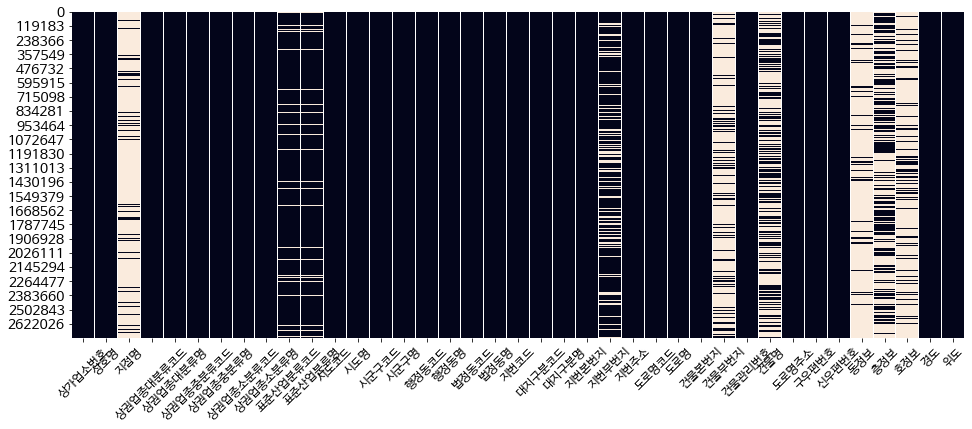

In [35]:
# seaborn heatmap
# row가 많아 시간이 조금 걸릴 수 있습니다.
import seaborn as sns

plt.figure(figsize=(16,6))
sns.heatmap(df_store.isnull(), cbar=False)
plt.xticks(rotation=45, fontsize=12)
plt.show()

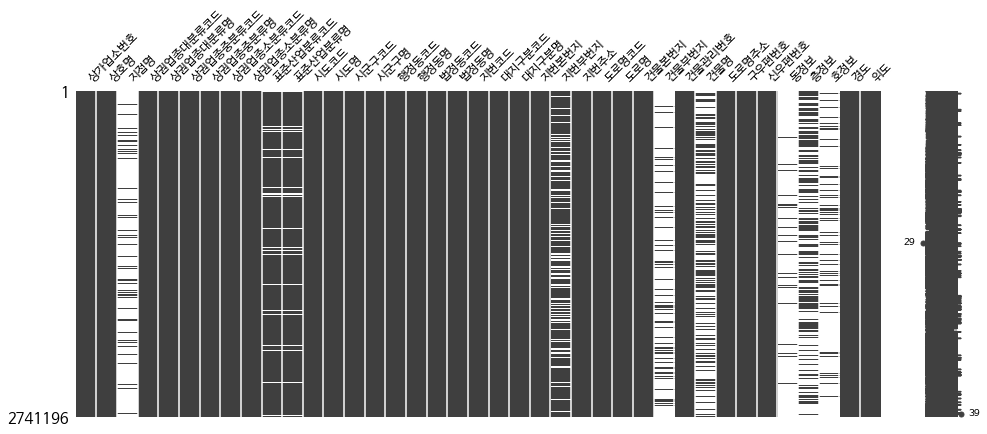

In [36]:
#!pip install missingno
import missingno as msno

msno.matrix(df_store, fontsize=12, figsize=(16,6))

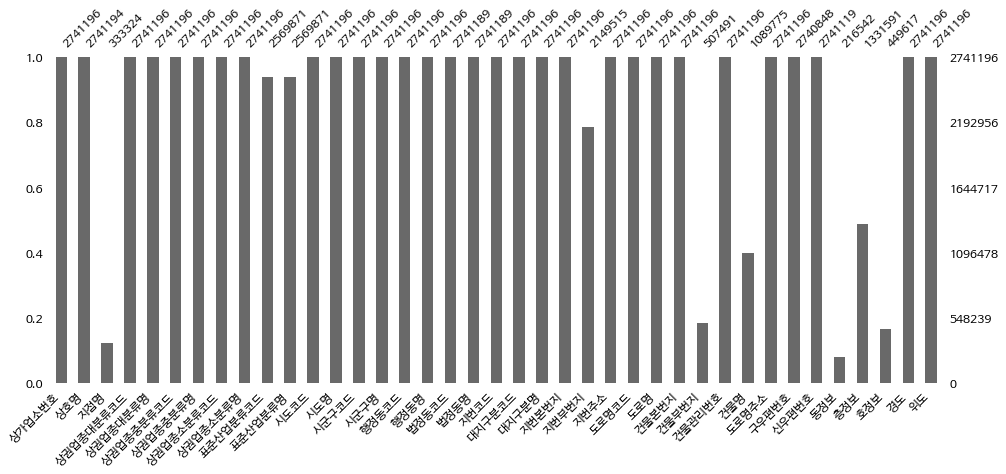

In [37]:
# missingno barplot

msno.bar(df_store, fontsize=12, figsize=(16,6))

***
#### **결측치 처리하기**  
- 결측치를 처리하는 방법에는 크게 삭제 혹은 특정값으로 채우는 방법이 있습니다.
- 데이터가 많을 경우 데이터를 삭제할 수도 있겠지만, 그렇지 않다면 데이터는 소중하기 때문에 특정값으로 대체하게 됩니다.
- 결측치 처리방법은 아래 링크를 참조해주세요.  
  
**(참고)**
- [pandas의 fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)
- [pandas의 dropna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)
- [pandas의 notnull](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.notnull.html)
- [pandas.DataFrame.any](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.any.html)
- [How to Handle Missing Data with Python](https://machinelearningmastery.com/handle-missing-data-python/)
- [Handling Missing Data](https://jakevdp.github.io/PythonDataScienceHandbook/03.04-missing-values.html)  
- [결측치 처리](https://eda-ai-lab.tistory.com/14) 
- [Pandas: Find Rows Where Column/Field Is Null](https://dzone.com/articles/pandas-find-rows-where-columnfield-is-null)

In [38]:
# 결측값이 비교적 적은 칼럼들만 선정

# df_store.columns

df_clr_columns = ['상가업소번호', '상호명', '상권업종대분류코드', 
              '상권업종대분류명', '상권업종중분류코드','상권업종중분류명',
              '상권업종소분류코드', '상권업종소분류명',
              '시도코드','시도명', '시군구코드', '시군구명', '행정동코드', 
              '행정동명', '법정동코드', '법정동명', '지번코드','대지구분코드',
              '대지구분명', '지번본번지','지번주소', '도로명코드', '도로명', 
              '건물본번지','도로명주소', '신우편번호',
              '경도', '위도']

df_store_clr = df_store[df_clr_columns].copy()
df_store_clr.shape

(2741196, 28)

In [39]:
# 다시 결측치 수 확인

df_store_clr.isnull().sum()

상가업소번호        0
상호명           2
상권업종대분류코드     0
상권업종대분류명      0
상권업종중분류코드     0
상권업종중분류명      0
상권업종소분류코드     0
상권업종소분류명      0
시도코드          0
시도명           0
시군구코드         0
시군구명          0
행정동코드         0
행정동명          0
법정동코드         7
법정동명          7
지번코드          0
대지구분코드        0
대지구분명         0
지번본번지         0
지번주소          0
도로명코드         0
도로명           0
건물본번지         0
도로명주소         0
신우편번호        77
경도            0
위도            0
dtype: int64

In [40]:
# null값을 포함한 row 출력하기

temp1 = df_store_clr[df_store_clr.isnull().any(axis=1)]
print(temp1.shape)

(86, 28)


In [41]:
# 모든 칼럼에 null값이 없는 row들만 출력하기

temp2 = df_store_clr[df_store_clr.notnull().all(axis=1)]
temp2.shape

(2741110, 28)

In [42]:
# null값이 있는 row 제거

df_store_clean = df_store_clr.dropna(axis=0)
df_store_clean.shape

(2741110, 28)

In [43]:
# df_store_clean 결측치 수

print(df_store_clean.shape)
df_store_clean.isnull().sum()

(2741110, 28)


상가업소번호       0
상호명          0
상권업종대분류코드    0
상권업종대분류명     0
상권업종중분류코드    0
상권업종중분류명     0
상권업종소분류코드    0
상권업종소분류명     0
시도코드         0
시도명          0
시군구코드        0
시군구명         0
행정동코드        0
행정동명         0
법정동코드        0
법정동명         0
지번코드         0
대지구분코드       0
대지구분명        0
지번본번지        0
지번주소         0
도로명코드        0
도로명          0
건물본번지        0
도로명주소        0
신우편번호        0
경도           0
위도           0
dtype: int64

***
#### **지리정보(위도,경도)를 이용해 지도를 그려봅니다.**

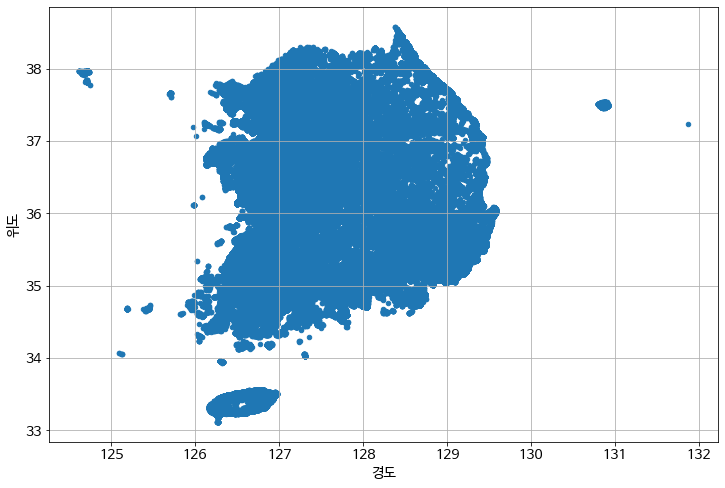

In [44]:
# 위도와 경도로 산점도를 그려봅니다.
# 대한민국 지도
# 데이터 수가 많아 시간이 조금 걸릴 수 있습니다.

df_store_clean.plot.scatter(x='경도', y='위도', figsize=(12,8),grid=True)

***
#### **데이터셋 중 서울을 시각화해봅니다.**

In [45]:
# df_store_clean 의 '도로명주소' 칼럼을 10행만 출력해봅니다.

df_store_clean['도로명주소'][:10]

0     서울특별시 강남구 남부순환로 2933
1       서울특별시 강남구 선릉로93길 6
2       서울특별시 금천구 가산로 34-6
3         부산광역시 사상구 괘감로 37
4         서울특별시 송파구 가락로 71
5    서울특별시 송파구 올림픽로 293-19
6      서울특별시 광진구 자양로39길 20
7       서울특별시 강서구 공항대로3길 9
8        서울특별시 중구 동호로7길 37
9      서울특별시 강서구 화곡로18길 31
Name: 도로명주소, dtype: object

**(참고)**
- [indexing and selecting data](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html)

In [0]:
# '도로명주소'를 기준으로 서울과 그 외 지역으로 구분해봅니다.

df_store_seoul = df_store_clean.loc[df_store_clean['도로명주소'].str.startswith('서울')]
df_store_other = df_store_clean.loc[~df_store_clean['도로명주소'].str.startswith('서울')]

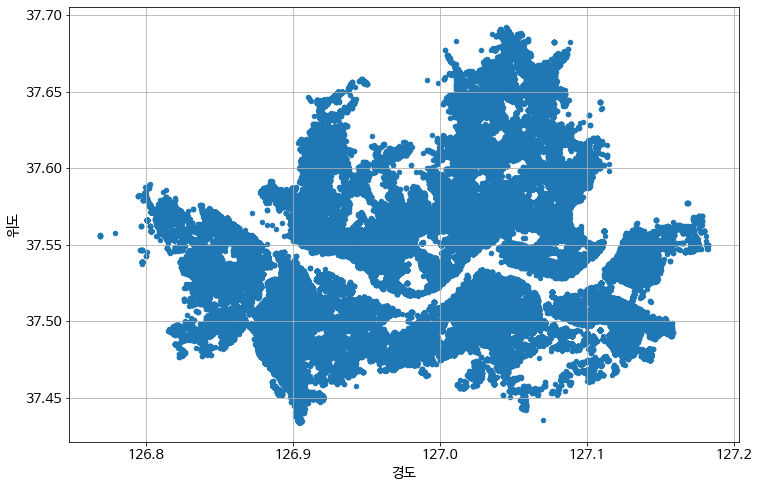

In [47]:
# matplotlib으로 시각화
# 서울만 찍어봅니다.

df_store_seoul.plot.scatter(x='경도',y='위도',figsize=(12,8), grid=True)

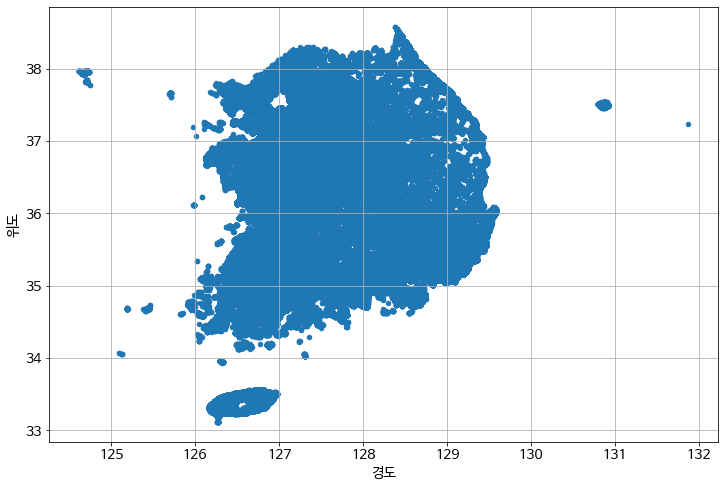

In [48]:
# 그 외의 지역 시각화

df_store_other.plot.scatter(x='경도',y='위도',figsize=(12,8), grid=True)

In [49]:
# '시군구명' 칼럼

df_store_seoul['시군구명'][:10]

0     강남구
1     강남구
2     금천구
4     송파구
5     송파구
6     광진구
7     강서구
8      중구
9     강서구
10    서초구
Name: 시군구명, dtype: object

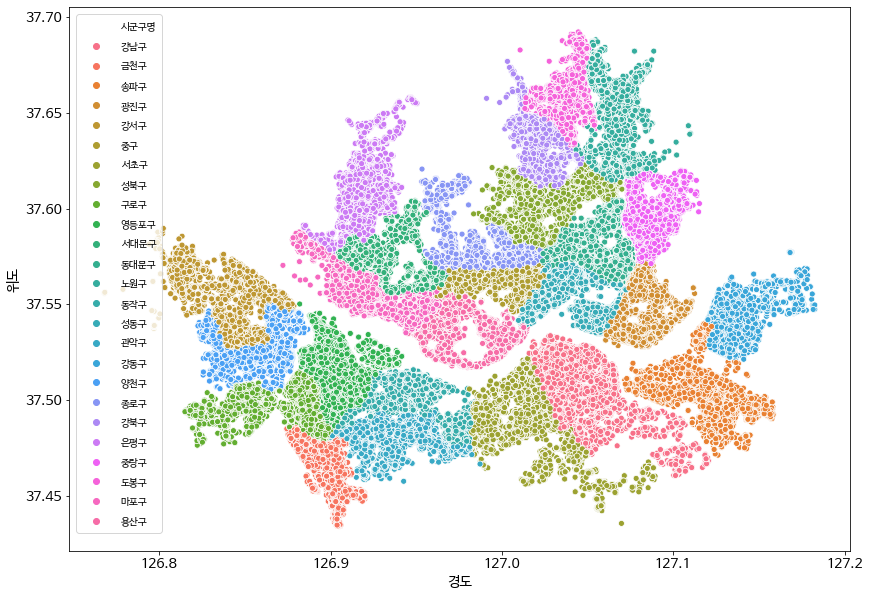

In [50]:
# seaborn으로 시각화
# 서울을 시군구명으로 구분지어 표시해봅니다.

plt.figure(figsize=(14, 10))
ax = sns.scatterplot(data=df_store_seoul, 
                     x='경도', 
                     y='위도', 
                     hue='시군구명')
plt.setp(ax.get_legend().get_texts(), fontsize='10')
plt.show()

***
**(참고)**
- [plotnine](https://plotnine.readthedocs.io/en/stable/about-plotnine.html)
- [ggplot2](https://ggplot2.tidyverse.org/)
- [ggplot2  cheatsheet](https://rstudio.com/wp-content/uploads/2015/03/ggplot2-cheatsheet.pdf)
- [A Comprehensive Guide to the Grammar of Graphics for Effective Visualization of Multi-dimensional Data](https://towardsdatascience.com/a-comprehensive-guide-to-the-grammar-of-graphics-for-effective-visualization-of-multi-dimensional-1f92b4ed4149)
- [파이썬에서 plotnine 사용하기](https://m.blog.naver.com/PostView.nhn?blogId=youji4ever&logNo=221596624963&proxyReferer=https%3A%2F%2Fwww.google.co.kr%2F)


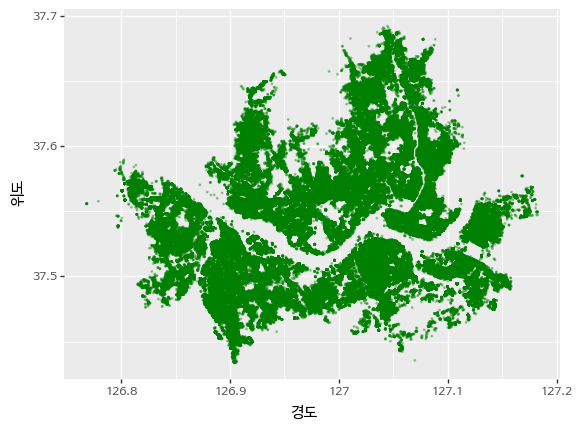

<ggplot: (-9223363267619014340)>

In [51]:
# plotnine으로 시각화

(
ggplot(df_store_seoul)
 + aes(x='경도', y='위도')
 + geom_point(color='green', alpha=0.3, size=0.2) #지도가 너무 뭉개보이지 않게 포인트 값 설정
 + theme(text=element_text(family='NanumBarunGothic'))
)

***
## **데이터 탐색** 

***
### **데이터 로드**

**(참고)**
- [Python Unicode](https://docs.python.org/ko/3.8/howto/unicode.html)
- [문자 인코딩의 개념](https://croak.tistory.com/44)
- [인코딩 방식 이해하기](https://studyforus.tistory.com/167)
- [파이썬에서의 한글 인코딩과의 싸움](https://ifyourfriendishacker.tistory.com/5)

In [0]:
# 서울이 포함된 01번 파일만 사용합니다.

df_fastfood_19 = pd.read_csv(dir + '상가(상권)정보_201912/상가업소정보_201912_01.csv', encoding='utf-8', delimiter='|')
df_fastfood_18 = pd.read_csv(dir + '소상공인시장진흥공단_상가업소정보_201812/소상공인시장진흥공단_상가업소정보_201812_1.csv', encoding='cp949')
df_fastfood_17 = pd.read_csv(dir + '상가업소정보(2017년 12월)/상가업소_201712_01.csv', encoding='utf-8')
df_fastfood_16 = pd.read_csv(dir + '상가업소정보 (2016년 12월)/상가업소_201612_01.csv', encoding='cp949')
df_fastfood_15 = pd.read_csv(dir + '상가업소정보 (2015년 12월)/상가업소_201512_01.csv', encoding='cp949')

In [53]:
# 연도별 데이터셋 shape(행,열) 확인

print("2019년도 shape : {}".format(df_fastfood_19.shape))
print("2018년도 shape : {}".format(df_fastfood_18.shape))
print("2017년도 shape : {}".format(df_fastfood_17.shape))
print("2016년도 shape : {}".format(df_fastfood_16.shape))
print("2015년도 shape : {}".format(df_fastfood_15.shape))

2019년도 shape : (573680, 39)
2018년도 shape : (499328, 39)
2017년도 shape : (464412, 39)
2016년도 shape : (516668, 39)
2015년도 shape : (537093, 39)


In [54]:
# 어떤 칼럼들이 있는지 확인해봅니다.

df_fastfood_19.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [55]:
# 랜덤으로 행 3개 출력

df_fastfood_19.sample(3)

상가업소번호      상호명   지점명 상권업종대분류코드  ...  층정보  호정보          경도         위도
396141  11750538   파파존스피자  연신내점         Q  ...    1  NaN  126.920053  37.627207
27837   23092343  선경컴퓨터세탁   NaN         F  ...  NaN  NaN  127.033908  37.594792
555914  16226191   마호가니커피  여의도점         Q  ...   19  NaN  126.923696  37.524540

[3 rows x 39 columns]

In [56]:
# 결측치 수 확인

df_fastfood_19.isnull().sum()

상가업소번호            0
상호명               1
지점명          497006
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      34390
표준산업분류명       34390
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         98756
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        501692
건물관리번호            0
건물명          308072
도로명주소             0
구우편번호             0
신우편번호             9
동정보          522824
층정보          226553
호정보          488414
경도                0
위도                0
dtype: int64

In [57]:
# 상호명이 null값이 아닌 것만

df_fastfood_19_clean = df_fastfood_19[df_fastfood_19['상호명'].notnull()]
df_fastfood_19_clean.isnull().sum()

상가업소번호            0
상호명               0
지점명          497005
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      34390
표준산업분류명       34390
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         98756
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        501691
건물관리번호            0
건물명          308072
도로명주소             0
구우편번호             0
신우편번호             9
동정보          522823
층정보          226553
호정보          488414
경도                0
위도                0
dtype: int64

In [58]:
# 맥도날드 단어가 포함된 데이터셋만 출력해봅니다.

temp1 = df_fastfood_19_clean[df_fastfood_19_clean['상호명'].str.contains('맥도날드')]
print(temp1.shape)
temp1.head(3)

(211, 39)


상가업소번호           상호명      지점명  ...  호정보          경도         위도
13865  20046994        맥원맥도날드  메가마트남천점  ...  NaN  129.111018  35.137275
14692  20037935  맥,킴한국맥도날드토곡점      토곡점  ...  NaN  129.102553  35.188191
24907  22500119          맥도날드      화양점  ...    1  127.072479  37.548067

[3 rows x 39 columns]

In [59]:
# 맥도날드|mcdonald 단어가 포함된 데이터셋만 출력해봅니다.

temp2 = df_fastfood_19_clean[df_fastfood_19_clean['상호명'].str.lower().str.contains('맥도날드|mcdonald')]
print(temp2.shape)
temp2.head(3)

(211, 39)


상가업소번호           상호명      지점명  ...  호정보          경도         위도
13865  20046994        맥원맥도날드  메가마트남천점  ...  NaN  129.111018  35.137275
14692  20037935  맥,킴한국맥도날드토곡점      토곡점  ...  NaN  129.102553  35.188191
24907  22500119          맥도날드      화양점  ...    1  127.072479  37.548067

[3 rows x 39 columns]

**(참고)**
- [python lower](https://zetawiki.com/wiki/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%AC%B8%EC%9E%90%EC%97%B4_lower())

In [60]:
# 맥도날드 데이터셋을 추출해봅니다.

df_fastfood_19_clean[df_fastfood_19_clean['상호명'].str.lower().str.contains('맥도날드|mcdonald')]['상권업종소분류명'].unique()

array(['패스트푸드', '인쇄종합'], dtype=object)

***
#### **필요한 패스트푸드점의 데이터를 선별합니다.**

**조건**
- '도로명주소'가 '서울'로 시작하는 경우
- '상권업종소분류명'이 '패스트푸드' 인 경우
- '상호명'에 브랜드명이 포함되는 경우

In [0]:
# '상호명'이 결측치인 row 제거

# df_fastfood_19_clean = df_fastfood_19[df_fastfood_19['상호명'].notnull()]
df_fastfood_18_clean = df_fastfood_18[df_fastfood_18['상호명'].notnull()]
df_fastfood_17_clean = df_fastfood_17[df_fastfood_17['상호명'].notnull()]
df_fastfood_16_clean = df_fastfood_16[df_fastfood_16['상호명'].notnull()]
df_fastfood_15_clean = df_fastfood_15[df_fastfood_15['상호명'].notnull()]

#### **1. 맥도날드 데이터셋 생성**

In [62]:
# 년도별 서울의 맥도날드 매장 생성

# 2019년도
df_mac_19 = df_fastfood_19_clean[\
                    (df_fastfood_19_clean['도로명주소'].str.startswith('서울'))&\
                    (df_fastfood_19_clean['상권업종소분류명']=='패스트푸드')&\
                    (df_fastfood_19_clean['상호명'].str.lower().str.contains("맥도날드|mcdonald"))]
# 년도 표시
df_mac_19['year'] = '2019'

# 2018년도
df_mac_18 = df_fastfood_18_clean[\
                    (df_fastfood_18_clean['도로명주소'].str.startswith('서울'))&\
                    (df_fastfood_18_clean['상권업종소분류명']=='패스트푸드')&\
                    (df_fastfood_18_clean['상호명'].str.lower().str.contains("맥도날드|mcdonald"))]
# 년도 표시
df_mac_18['year'] = '2018'

# 2017년도
df_mac_17 = df_fastfood_17_clean[\
                    (df_fastfood_17_clean['도로명주소'].str.startswith('서울'))&\
                    (df_fastfood_17_clean['상권업종소분류명']=='패스트푸드')&\
                    (df_fastfood_17_clean['상호명'].str.lower().str.contains("맥도날드|mcdonald"))]
# 년도 표시
df_mac_17['year'] = '2017'

# 2016년도
df_mac_16 = df_fastfood_16_clean[\
                    (df_fastfood_16_clean['도로명주소'].str.startswith('서울'))&\
                    (df_fastfood_16_clean['상권업종소분류명']=='패스트푸드')&\
                    (df_fastfood_16_clean['상호명'].str.lower().str.contains("맥도날드|mcdonald"))]
# 년도 표시
df_mac_16['year'] = '2016'

# 2015년도
df_mac_15 = df_fastfood_15_clean[\
                    (df_fastfood_15_clean['도로명주소'].str.startswith('서울'))&\
                    (df_fastfood_15_clean['상권업종소분류명']=='패스트푸드')&\
                    (df_fastfood_15_clean['상호명'].str.lower().str.contains("맥도날드|mcdonald"))]
# 년도 표시
df_mac_15['year'] = '2015'

# 하나의 데이터 셋으로
df_mac = pd.concat([df_mac_19, df_mac_18, df_mac_17, df_mac_16, df_mac_15], axis=0)
df_mac['brand'] = 'mac'
df_mac.shape

(562, 41)

#### **2. 버거킹 데이터셋 생성**

In [63]:
# 년도별 서울의 버거킹 매장 생성

# 2019년도
df_bk_19 = df_fastfood_19_clean[\
                    (df_fastfood_19_clean['도로명주소'].str.startswith('서울'))&\
                    (df_fastfood_19_clean['상권업종소분류명']=='패스트푸드')&\
                    (df_fastfood_19_clean['상호명'].str.lower().str.contains("버거킹|burgerking"))]
# 년도 표시
df_bk_19['year'] = '2019'

# 2018년도
df_bk_18 = df_fastfood_18_clean[\
                    (df_fastfood_18_clean['도로명주소'].str.startswith('서울'))&\
                    (df_fastfood_18_clean['상권업종소분류명']=='패스트푸드')&\
                    (df_fastfood_18_clean['상호명'].str.lower().str.contains("버거킹|burgerking"))]
# 년도 표시
df_bk_18['year'] = '2018'

# 2017년도
df_bk_17 = df_fastfood_17_clean[\
                    (df_fastfood_17_clean['도로명주소'].str.startswith('서울'))&\
                    (df_fastfood_17_clean['상권업종소분류명']=='패스트푸드')&\
                    (df_fastfood_17_clean['상호명'].str.lower().str.contains("버거킹|burgerking"))]
# 년도 표시
df_bk_17['year'] = '2017'

# 2016년도
df_bk_16 = df_fastfood_16_clean[\
                    (df_fastfood_16_clean['도로명주소'].str.startswith('서울'))&\
                    (df_fastfood_16_clean['상권업종소분류명']=='패스트푸드')&\
                    (df_fastfood_16_clean['상호명'].str.lower().str.contains("버거킹|burgerking"))]
# 년도 표시
df_bk_16['year'] = '2016'

# 2015년도
df_bk_15 = df_fastfood_15_clean[\
                    (df_fastfood_15_clean['도로명주소'].str.startswith('서울'))&\
                    (df_fastfood_15_clean['상권업종소분류명']=='패스트푸드')&\
                    (df_fastfood_15_clean['상호명'].str.lower().str.contains("버거킹|burgerking"))]
# 년도 표시
df_bk_15['year'] = '2015'

# 하나의 데이터 셋으로
df_bk = pd.concat([df_bk_19, df_bk_18, df_bk_17, df_bk_16, df_bk_15], axis=0)
df_bk['brand'] = 'bk'
df_bk.shape

(586, 41)

#### **3. 롯데리아 데이터셋 생성**

In [64]:
# 년도별 서울의 롯데리아 매장 생성

# 2019년도
df_lott_19 = df_fastfood_19_clean[\
                    (df_fastfood_19_clean['도로명주소'].str.startswith('서울'))&\
                    (df_fastfood_19_clean['상권업종소분류명']=='패스트푸드')&\
                    (df_fastfood_19_clean['상호명'].str.lower().str.contains("롯데리아|lotteria"))]
# 년도 표시
df_lott_19['year'] = '2019'

# 2018년도
df_lott_18 = df_fastfood_18_clean[\
                    (df_fastfood_18_clean['도로명주소'].str.startswith('서울'))&\
                    (df_fastfood_18_clean['상권업종소분류명']=='패스트푸드')&\
                    (df_fastfood_18_clean['상호명'].str.lower().str.contains("롯데리아|lotteria"))]
# 년도 표시
df_lott_18['year'] = '2018'

# 2017년도
df_lott_17 = df_fastfood_17_clean[\
                    (df_fastfood_17_clean['도로명주소'].str.startswith('서울'))&\
                    (df_fastfood_17_clean['상권업종소분류명']=='패스트푸드')&\
                    (df_fastfood_17_clean['상호명'].str.lower().str.contains("롯데리아|lotteria"))]
# 년도 표시
df_lott_17['year'] = '2017'

# 2016년도
df_lott_16 = df_fastfood_16_clean[\
                    (df_fastfood_16_clean['도로명주소'].str.startswith('서울'))&\
                    (df_fastfood_16_clean['상권업종소분류명']=='패스트푸드')&\
                    (df_fastfood_16_clean['상호명'].str.lower().str.contains("롯데리아|lotteria"))]
# 년도 표시
df_lott_16['year'] = '2016'

# 2015년도
df_lott_15 = df_fastfood_15_clean[\
                    (df_fastfood_15_clean['도로명주소'].str.startswith('서울'))&\
                    (df_fastfood_15_clean['상권업종소분류명']=='패스트푸드')&\
                    (df_fastfood_15_clean['상호명'].str.lower().str.contains("롯데리아|lotteria"))]
# 년도 표시
df_lott_15['year'] = '2015'

# 하나의 데이터 셋으로
df_lott = pd.concat([df_lott_19, df_lott_18, df_lott_17, df_lott_16, df_lott_15], axis=0)
df_lott['brand'] = 'lott'
df_lott.shape

(758, 41)

#### **4. 맘스터치 데이터셋 생성**

In [65]:
# 년도별 서울의 롯데리아 매장 생성

# 2019년도
df_moms_19 = df_fastfood_19_clean[\
                    (df_fastfood_19_clean['도로명주소'].str.startswith('서울'))&\
                    (df_fastfood_19_clean['상권업종소분류명']=='패스트푸드')&\
                    (df_fastfood_19_clean['상호명'].str.lower().str.contains("맘스터치|momstouch"))]
# 년도 표시
df_moms_19['year'] = '2019'

# 2018년도
df_moms_18 = df_fastfood_18_clean[\
                    (df_fastfood_18_clean['도로명주소'].str.startswith('서울'))&\
                    (df_fastfood_18_clean['상권업종소분류명']=='패스트푸드')&\
                    (df_fastfood_18_clean['상호명'].str.lower().str.contains("맘스터치|momstouch"))]
# 년도 표시
df_moms_18['year'] = '2018'

# 2017년도
df_moms_17 = df_fastfood_17_clean[\
                    (df_fastfood_17_clean['도로명주소'].str.startswith('서울'))&\
                    (df_fastfood_17_clean['상권업종소분류명']=='패스트푸드')&\
                    (df_fastfood_17_clean['상호명'].str.lower().str.contains("맘스터치|momstouch"))]
# 년도 표시
df_moms_17['year'] = '2017'

# 2016년도
df_moms_16 = df_fastfood_16_clean[\
                    (df_fastfood_16_clean['도로명주소'].str.startswith('서울'))&\
                    (df_fastfood_16_clean['상권업종소분류명']=='패스트푸드')&\
                    (df_fastfood_16_clean['상호명'].str.lower().str.contains("맘스터치|momstouch"))]
# 년도 표시
df_moms_16['year'] = '2016'

# 2015년도
df_moms_15 = df_fastfood_15_clean[\
                    (df_fastfood_15_clean['도로명주소'].str.startswith('서울'))&\
                    (df_fastfood_15_clean['상권업종소분류명']=='패스트푸드')&\
                    (df_fastfood_15_clean['상호명'].str.lower().str.contains("맘스터치|momstouch"))]
# 년도 표시
df_moms_15['year'] = '2015'

# 하나의 데이터 셋으로
df_moms = pd.concat([df_moms_19, df_moms_18, df_moms_17, df_moms_16, df_moms_15], axis=0)
df_moms['brand'] = 'moms'
df_moms.shape

(133, 41)

In [66]:
# 하나의 데이터셋으로 합쳐줍니다.
df_fastfood = pd.concat([df_mac, df_bk, df_lott, df_moms], axis=0)

# 인덱싱 재지정
df_fastfood = df_fastfood.reset_index(drop=True)
df_fastfood.shape

(2039, 41)

In [67]:
# info로 확인해봅니다.

df_fastfood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2039 entries, 0 to 2038
Data columns (total 41 columns):
상가업소번호       2039 non-null int64
상호명          2039 non-null object
지점명          1749 non-null object
상권업종대분류코드    2039 non-null object
상권업종대분류명     2039 non-null object
상권업종중분류코드    2039 non-null object
상권업종중분류명     2039 non-null object
상권업종소분류코드    2039 non-null object
상권업종소분류명     2039 non-null object
표준산업분류코드     2039 non-null object
표준산업분류명      2039 non-null object
시도코드         2039 non-null int64
시도명          2039 non-null object
시군구코드        2039 non-null int64
시군구명         2039 non-null object
행정동코드        2039 non-null float64
행정동명         2039 non-null object
법정동코드        2039 non-null int64
법정동명         2039 non-null object
지번코드         2039 non-null int64
대지구분코드       2039 non-null int64
대지구분명        2039 non-null object
지번본번지        2039 non-null object
지번부번지        1587 non-null object
지번주소         2039 non-null object
도로명코드        2039 non-null int64
도로명          20

In [68]:
# 결측치 수 확인

df_fastfood.isnull().sum()

상가업소번호          0
상호명             0
지점명           290
상권업종대분류코드       0
상권업종대분류명        0
상권업종중분류코드       0
상권업종중분류명        0
상권업종소분류코드       0
상권업종소분류명        0
표준산업분류코드        0
표준산업분류명         0
시도코드            0
시도명             0
시군구코드           0
시군구명            0
행정동코드           0
행정동명            0
법정동코드           0
법정동명            0
지번코드            0
대지구분코드          0
대지구분명           0
지번본번지           0
지번부번지         452
지번주소            0
도로명코드           0
도로명             0
건물본번지           0
건물부번지        1946
건물관리번호          0
건물명           646
도로명주소           0
구우편번호           0
신우편번호           0
동정보          1969
층정보           454
호정보          1863
경도              0
위도              0
year            0
brand           0
dtype: int64

In [69]:
# 임의로 3행 출력

df_fastfood.sample(3)

상가업소번호     상호명      지점명 상권업종대분류코드  ...          경도         위도  year brand
1111  25997804  BKR버거킹      암사점         Q  ...  127.127922  37.550398  2015    bk
1038  11918893  BKR버거킹     동국대점         Q  ...  126.998500  37.559149  2016    bk
357   11255947    맥도날드  신월SKDT점         Q  ...  126.838707  37.519716  2017   mac

[3 rows x 41 columns]

***
### **질문1. "맥도날드 매장 수는 계속 줄어들고 있을까?"**

In [70]:
# 맥도날드 매장의 연도별 매장 수를 확인해봅니다.

df_mac_year = pd.DataFrame(df_mac['year'].value_counts())

# 인덱싱 재지정
df_mac_year = df_mac_year.reset_index()
df_mac_year.columns = ['연도', '매장수']
df_mac_year

연도  매장수
0  2016  134
1  2019  134
2  2017  127
3  2018  116
4  2015   51

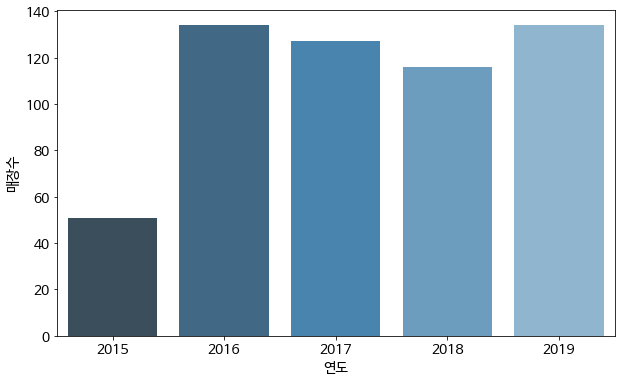

In [71]:
# barplot

plt.figure(figsize=(10,6))
sns.barplot(data = df_mac_year,
           x = '연도',
           y = '매장수',
           palette="Blues_d"
           )
plt.show()

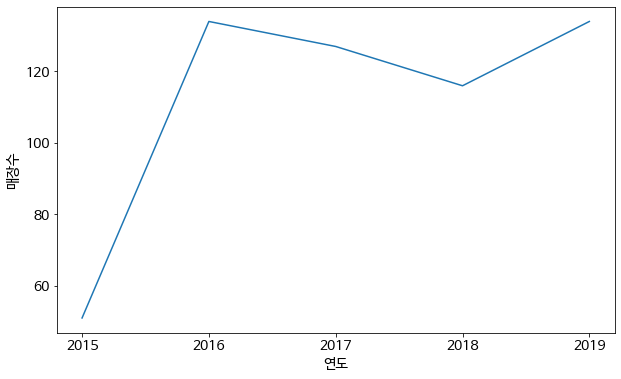

In [72]:
# lineplot

plt.figure(figsize=(10,6))
ax = sns.lineplot(data = df_mac_year,
                   x = '연도',
                   y = '매장수',
                 palette="Blues_d"
                )
plt.show()

**=> 질문 1. "맥도날드 매장 수는 계속 줄어들고 있을까?"에 대한 답은 "17년, 18년도에는 감소했지만, 19년도에는 다시 증가했기 때문에 계속해서 줄어든다고는 말하기는 어렵다." 고 확인할 수 있습니다.**

***
### **질문 2. 버거킹은 맥도날드를 매장수에서 이겼을까?**

#### **다른 브랜드들은 어떨지 한번 살펴보겠습니다.**

**(참고)**  
- [pandas의 group by 공식문서1](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)  
- [pandas의 group by 공식문서2](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)
- [pandas의 multi-index](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html)
- [reset_index](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html)

In [73]:
# 전체 데이터셋에서 연도와 브랜드별로 브랜드 수를 세어줍니다.

df_fastfood_year = pd.DataFrame(df_fastfood.groupby(by=['year','brand'])['brand'].count())
df_fastfood_year.columns = ['매장수']
df_fastfood_year

매장수
year brand     
2015 bk     100
     lott   153
     mac     51
     moms     6
2016 bk     122
     lott   141
     mac    134
     moms    16
2017 bk     109
     lott   144
     mac    127
     moms    30
2018 bk     112
     lott   146
     mac    116
     moms    40
2019 bk     143
     lott   174
     mac    134
     moms    41

In [74]:
# 멀티 인덱스 중 원하는 인덱스를 칼럼으로 보낼때 reset_index를 사용합니다.

df_fastfood_year.reset_index(level=["brand"], inplace=True)
df_fastfood_year

brand  매장수
year           
2015    bk  100
2015  lott  153
2015   mac   51
2015  moms    6
2016    bk  122
2016  lott  141
2016   mac  134
2016  moms   16
2017    bk  109
2017  lott  144
2017   mac  127
2017  moms   30
2018    bk  112
2018  lott  146
2018   mac  116
2018  moms   40
2019    bk  143
2019  lott  174
2019   mac  134
2019  moms   41

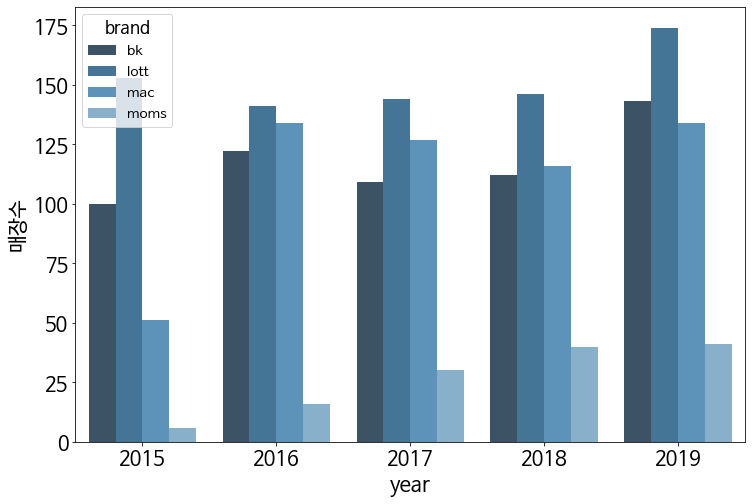

In [75]:
# barplot
# 다른 브랜드들과 비교 

# plot 사이즈 조절
plt.figure(figsize=(12,8)) # 차트 사이즈
plt.rc('legend', fontsize=14) # 범례 사이즈
plt.rc('axes', labelsize=20) # 축 제목
plt.rc('font', size=20) # x,y 축 값
# plt.xticks(fontsize=20, rotation=0) # x축 값

sns.barplot(data = df_fastfood_year,
           x = df_fastfood_year.index,
           y = '매장수',
           hue = 'brand',
           palette="Blues_d"
           )

plt.show()

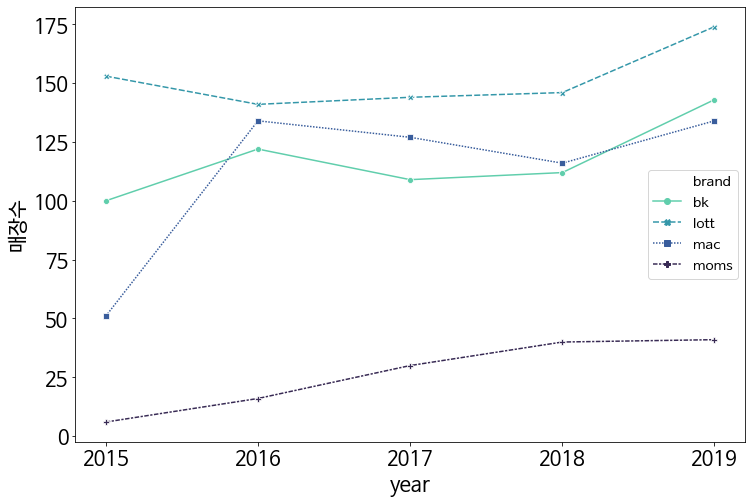

In [76]:
# lineplot
# 다른 브랜드들과 비교 

# plot 사이즈 조절
plt.figure(figsize=(12,8)) # 차트 사이즈
plt.rc('legend', fontsize=14) # 범례 사이즈
plt.rc('axes', labelsize=20) # 축 제목
plt.rc('font', size=20) # x,y 축 값
# plt.xticks(fontsize=20, rotation=0) # x축 값

palette = sns.color_palette("mako_r", 4)

sns.lineplot(data = df_fastfood_year,
           x = df_fastfood_year.index,
           y = '매장수',
           hue = 'brand',
           style="brand",
           palette=palette,           
           markers=True,
           sizes=(6,6)
           )

plt.show()

**=> 서울에서의 햄버거 브랜드들의 매장 수 변화를 살펴보면, 16년도에는 롯데리아를 제외한 다른 매장들은 전부 증가했고, 특히 맥도날드 매장 수가 급격히 증가했음을 알 수 있습니다. 하지만, 이후 18년도까지는 맥도날드와 버거킹 모두 다소 감소한 반면, 맘스터치의 경우 꾸준히 매장 수를 늘린 모습을 볼 수 있습니다. 2019년도에는 모든 매장들이 전년도에 비해 증가했으며, 버거킹의 매장 수는 19년도에 맥도날드 매장 수보다 조금 더 많은 모습을 보이고 있습니다.**

**=> 질문 2. "버거킹은 맥도날드를 매장수에서 이겼을까?"에 대한 답은 서울에서 16~18년도에는 맥도날드에 비해 적었지만, 19년도에 들어서는 맥도날드를 매장 수에서 역전했습니다.**


***
### **질문 3. 패스트푸드 매장은 어느 지역에 많이 분포할까?**

**(참고)**
- [공식 github](https://github.com/python-visualization/folium)
- [공식 document](https://python-visualization.github.io/folium/)
- [folium modules](https://python-visualization.github.io/folium/modules.html#folium.map.Icon)
- [examples](https://nbviewer.jupyter.org/github/python-visualization/folium/tree/master/examples/)
- [folium – 지리정보 시각화](https://oboki.net/workspace/programming/language/python/folium-%EC%A7%80%EB%A6%AC%EC%A0%95%EB%B3%B4-%EC%8B%9C%EA%B0%81%ED%99%94/)
- [folium - icon](https://getbootstrap.com/docs/3.3/components/)

In [0]:
# 물음표를 붙여서 공식문서를 확인할 수 있습니다.

# folium.Map?

In [78]:
# 사용할 데이터
df_geo = df_mac

# 지도를 처음 열어줄 때, 어디를 중심으로 보여줄지 설정합니다.
# 위도와 경도의 평균값을 중심점으로 잡습니다.
# zoom_start는 처음 지도의 크기를 뜻합니다.
map = folium.Map(location=[df_geo['위도'].mean(),df_geo['경도'].mean()],
                           zoom_start=1)

map

***
#### **2019년도 서울의 맥도날드 매장 분포**

In [79]:
# folium을 통한 2019년도 서울의 맥도날드 매장 분포 시각화

# 사용할 데이터
df_geo = df_mac

# 지도를 처음 열어줄 때, 어디를 중심으로 보여줄지 설정합니다.
# 위도와 경도의 평균값을 중심점으로 잡습니다.
# zoom_start는 처음 지도의 크기를 뜻합니다.
map = folium.Map(location=[df_geo['위도'].mean(),df_geo['경도'].mean()],
                           zoom_start=11.5)

# 지도 시각화
for g in df_geo.index:
    
    if (df_geo.loc[g, 'brand'] == 'mac') & (df_geo.loc[g, 'year'] == '2019'):
        icon_color = 'red'
        icon_shape = 'home'
                
#     else:
#         icon_color = 'pink'        
    
    folium.Marker([df_geo.loc[g, '위도'], df_geo.loc[g, '경도']], 
                  icon=folium.Icon(color=icon_color,
                                  icon=icon_shape)).add_to(map)

# map.save('./map1.html')
map

In [80]:
# folium.CircleMaker

# 사용할 데이터
df_geo = df_mac

# 지도를 처음 열어줄 때, 어디를 중심으로 보여줄지 설정합니다.
# 위도와 경도의 평균값을 중심점으로 잡습니다.
# zoom_start는 처음 지도의 크기를 뜻합니다.
map = folium.Map(location=[df_geo['위도'].mean(),df_geo['경도'].mean()],
                           zoom_start=11.5)

# 지도 시각화
for g in df_geo.index:
    
    if (df_geo.loc[g, 'brand'] == 'mac') & (df_geo.loc[g, 'year'] == '2019'):
        icon_color = 'red'
      
    folium.CircleMarker(
        location=[df_geo.loc[g,'위도'], df_geo.loc[g, '경도']],
        radius=2,
        color= icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)

# map.save(./map2.html')
map

***
#### **(참고) Choropleth map using GeoJSON**   
- [choropleth map](https://en.wikipedia.org/wiki/Choropleth_map)
- [choropleth maps in python](https://plot.ly/python/choropleth-maps/)
- [choropleth github](https://github.com/southkorea/seoul-maps)
- [choropleth colorbrewer2](http://colorbrewer2.org/#type=sequential&scheme=GnBu&n=3)
- [choropleth video](https://ko.coursera.org/lecture/python-for-data-visualization/choropleth-maps-nonRJ)

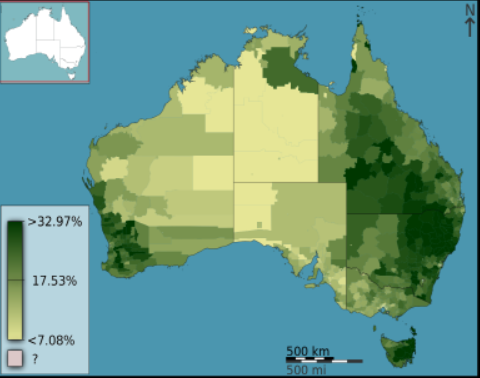

In [0]:
import json

geo_path_seoul = dir + 'seoul-maps-master/kostat/2013/json/seoul_municipalities_geo.json'
geo_json = json.load(open(geo_path_seoul, encoding='utf-8'))

In [82]:
# 행정구역별 맥도날드 매장수 카운트

geo_gu = pd.DataFrame(df_mac[df_mac['year']=='2019']['시군구명'].value_counts())

# 인덱싱 재지정
geo_gu = geo_gu.reset_index()
geo_gu.columns = ['구', '매장수']
geo_gu

구  매장수
0    강남구   14
1    서초구    9
2    강서구    8
3    강동구    7
4    송파구    7
5    종로구    7
6    양천구    7
7   동대문구    6
8    금천구    6
9    강북구    6
10   광진구    5
11   노원구    5
12  영등포구    5
13   구로구    5
14   마포구    5
15   은평구    4
16   동작구    4
17    중구    4
18  서대문구    4
19   성북구    3
20   성동구    3
21   도봉구    3
22   중랑구    3
23   용산구    2
24   관악구    2

- [choropleth colorbrewer2](http://colorbrewer2.org/#type=sequential&scheme=GnBu&n=3)

In [83]:
# choropleth

# 사용할 데이터
df_geo = df_mac

# location 정보는 지도의 중심을 어디로 정해줄지 정해줍니다.
map = folium.Map(location=[df_geo['위도'].mean(), df_geo['경도'].mean()],\
                 zoom_start=12)

# choropleth map
map.choropleth(geo_data = geo_json,
               data = geo_gu,
               columns = ['구', '매장수'],
               key_on = 'feature.properties.name',
               fill_color = 'GnBu',               
               fill_opacity=0.7,
               line_opacity=0.7,
               highlight=True)

map

In [84]:
# 맥도날드 매장과 함께 표시해주기
# folium.CircleMaker

# 사용할 데이터
df_geo = df_mac

# 지도를 처음 열어줄 때, 어디를 중심으로 보여줄지 설정합니다.
# 위도와 경도의 평균값을 중심점으로 잡습니다.
# zoom_start는 처음 지도의 크기를 뜻합니다.
map = folium.Map(location=[df_geo['위도'].mean(),df_geo['경도'].mean()],
                           zoom_start=11.5)

# choropleth map
map.choropleth(geo_data = geo_json,
               data = geo_gu,
               columns = ['구', '매장수'],
               key_on = 'feature.properties.name',
               fill_color = 'GnBu',               
               fill_opacity=0.5,
               line_opacity=0.7,
               highlight=True)

# 지도 시각화
for g in df_geo.index:
    
    if (df_geo.loc[g, 'brand'] == 'mac') & (df_geo.loc[g, 'year'] == '2019'):
        icon_color = 'red'
      
    folium.CircleMarker(
        location=[df_geo.loc[g,'위도'], df_geo.loc[g, '경도']],
        radius=2,
        color= icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)

# map.save(./map2.html')
map

**=> 맥도날드 매장 수가 가장 많이 분포해있는 곳은 강남구이며, 용산구와 관악구에 가장 적게 분포해있습니다.**

***
#### **연도별 패스트푸드 매장 분포 비교**


#### **2015년도**

In [85]:
# 2015년도 행정구역별 패스트푸드 매장수

geo_gu_15 = pd.DataFrame(df_fastfood[df_fastfood['year']=='2015']['시군구명'].value_counts())

# 인덱싱 재지정
geo_gu_15 = geo_gu_15.reset_index()
geo_gu_15.columns = ['구', '매장수']
geo_gu_15

구  매장수
0    강남구   44
1     중구   20
2    송파구   18
3    강동구   18
4    서초구   18
5    관악구   16
6   영등포구   16
7    마포구   16
8    용산구   14
9   서대문구   13
10   종로구   12
11   구로구   11
12   광진구   11
13   양천구   10
14  동대문구   10
15   성북구    9
16   금천구    9
17   성동구    8
18   중랑구    8
19   강서구    6
20   강북구    5
21   동작구    5
22   은평구    5
23   노원구    4
24   도봉구    4

In [86]:
# folium.CircleMaker

# 사용할 데이터
df_geo = df_fastfood

# 지도를 처음 열어줄 때, 어디를 중심으로 보여줄지 설정합니다.
# 위도와 경도의 평균값을 중심점으로 잡습니다.
# zoom_start는 처음 지도의 크기를 뜻합니다.
map = folium.Map(location=[df_geo['위도'].mean(),df_geo['경도'].mean()],
                           zoom_start=12)

# choropleth map
map.choropleth(geo_data = geo_json,
               data = geo_gu_15,
               columns = ['구', '매장수'],
               key_on = 'feature.properties.name',
               fill_color = 'GnBu',               
               fill_opacity=0.5,
               line_opacity=0.7,
               highlight=True)

# 지도 시각화
for g in df_geo.index:
    
    if (df_geo.loc[g, 'brand'] == 'mac') & (df_geo.loc[g, 'year'] == '2015'):
        icon_color = 'red'
                
    elif (df_geo.loc[g, 'brand'] == 'bk') & (df_geo.loc[g, 'year'] == '2015'):
        icon_color = 'blue'
    
    elif (df_geo.loc[g, 'brand'] == 'lott') & (df_geo.loc[g, 'year'] == '2015'):
        icon_color = 'lightgreen'
    
    elif (df_geo.loc[g, 'brand'] == 'moms') & (df_geo.loc[g, 'year'] == '2015'):
        icon_color = 'orange'
        
      
    folium.CircleMarker(
        location=[df_geo.loc[g,'위도'], df_geo.loc[g, '경도']],
        radius=1.2,
        color= icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)

# map.save(./map2.html')
map

Output hidden; open in https://colab.research.google.com to view.

**(참고)**
- [pandas multi index](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html)
- [DataFrame의 멀티인덱스와 멀티컬럼](https://data-make.tistory.com/126)

In [87]:
# 행정구역별 브랜드 매장 수

df_fastfood_gu_15 = pd.DataFrame(df_fastfood[df_fastfood["year"]=='2015'].groupby(by=['시군구명','brand'])['brand'].count())

df_fastfood_gu_15.columns = ['매장수']

# 멀티인덱스에서 원하는 인덱스를 칼럼으로 지정해주기
df_fastfood_gu_15.reset_index(level=["brand"], inplace=True)
df_fastfood_gu_15

brand  매장수
시군구명           
강남구     bk   26
강남구   lott   10
강남구    mac    8
강동구     bk    5
강동구   lott    9
...    ...  ...
중구    lott   11
중구     mac    1
중랑구     bk    1
중랑구   lott    6
중랑구    mac    1

[73 rows x 2 columns]

In [88]:
# 행정구역별 패스트푸드 매장수 상위 10개 구

df_gu_top10_15 = df_fastfood_gu_15.loc[geo_gu_15['구'][:10],:]
df_gu_top10_15

brand  매장수
시군구명           
강남구     bk   26
강남구   lott   10
강남구    mac    8
중구      bk    8
중구    lott   11
중구     mac    1
송파구     bk    7
송파구   lott    9
송파구    mac    2
강동구     bk    5
강동구   lott    9
강동구    mac    3
강동구   moms    1
서초구     bk    8
서초구   lott    6
서초구    mac    4
관악구     bk    6
관악구   lott    9
관악구    mac    1
영등포구    bk    5
영등포구  lott    6
영등포구   mac    5
마포구     bk    1
마포구   lott   12
마포구    mac    3
용산구     bk    4
용산구   lott   10
서대문구    bk    3
서대문구  lott    8
서대문구   mac    2

In [89]:
df_gu_top10_15.index.unique().values

array(['강남구', '중구', '송파구', '강동구', '서초구', '관악구', '영등포구', '마포구', '용산구',
       '서대문구'], dtype=object)

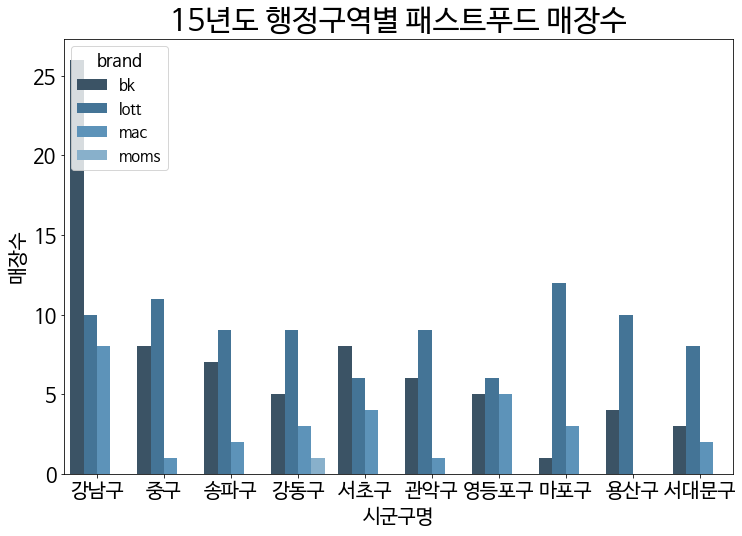

In [90]:
# barplot
# 다른 브랜드들과 비교 

# plot 사이즈 조절
plt.figure(figsize=(12,8)) # 차트 사이즈
plt.rc('legend', fontsize=15) # 범례 사이즈
plt.rc('axes', labelsize=20) # 축 제목
plt.rc('font', size=20) # x,y 축 값
# plt.xticks(fontsize=20, rotation=0) # x축 값

sns.barplot(data = df_gu_top10_15,
           x = df_gu_top10_15.index,
           y = '매장수',
           hue = 'brand',
           palette="Blues_d"
           )

plt.title("15년도 행정구역별 패스트푸드 매장수", fontsize=30)
plt.show()

**=> 패스트매장 수가 제일 많은 곳은 강남구이며, 상대적으로 버거킹 매장 수가 많음을 확인할 수 있습니다. 반면, 마포구와 용산구 서대문구에서는 롯데리아의 매장 수가 상대적으로 많았습니다.**

#### **2016년도**

In [91]:
# 2016년도 행정구역별 패스트푸드 매장수

geo_gu_16 = pd.DataFrame(df_fastfood[df_fastfood['year']=='2016']['시군구명'].value_counts())
geo_gu_16 = geo_gu_16.reset_index()
geo_gu_16.columns = ['구', '매장수']
geo_gu_16.head(10)

구  매장수
0   강남구   49
1   송파구   25
2   서초구   24
3   강동구   23
4   마포구   21
5   용산구   21
6    중구   19
7  영등포구   18
8   성북구   18
9   양천구   17

In [92]:
# folium.CircleMaker

# 사용할 데이터
df_geo = df_fastfood

# 지도를 처음 열어줄 때, 어디를 중심으로 보여줄지 설정합니다.
# 위도와 경도의 평균값을 중심점으로 잡습니다.
# zoom_start는 처음 지도의 크기를 뜻합니다.
map = folium.Map(location=[df_geo['위도'].mean(),df_geo['경도'].mean()],
                           zoom_start=12)

# choropleth map
map.choropleth(geo_data = geo_json,
               data = geo_gu_16,
               columns = ['구', '매장수'],
               key_on = 'feature.properties.name',
               fill_color = 'GnBu',               
               fill_opacity=0.5,
               line_opacity=0.7,
               highlight=True)

# 지도 시각화
for g in df_geo.index:
    
    if (df_geo.loc[g, 'brand'] == 'mac') & (df_geo.loc[g, 'year'] == '2016'):
        icon_color = 'red'
                
    elif (df_geo.loc[g, 'brand'] == 'bk') & (df_geo.loc[g, 'year'] == '2016'):
        icon_color = 'blue'
    
    elif (df_geo.loc[g, 'brand'] == 'lott') & (df_geo.loc[g, 'year'] == '2016'):
        icon_color = 'lightgreen'
    
    elif (df_geo.loc[g, 'brand'] == 'moms') & (df_geo.loc[g, 'year'] == '2016'):
        icon_color = 'orange'
        
      
    folium.CircleMarker(
        location=[df_geo.loc[g,'위도'], df_geo.loc[g, '경도']],
        radius=1.2,
        color= icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)

# map.save(./map2.html')
map

Output hidden; open in https://colab.research.google.com to view.

In [93]:
# 행정구역별 브랜드 매장 수

df_fastfood_gu_16 = pd.DataFrame(df_fastfood[df_fastfood["year"]=='2016'].groupby(by=['시군구명','brand'])['brand'].count())
df_fastfood_gu_16.columns = ['매장수']
df_fastfood_gu_16.sort_values(by='매장수')
df_fastfood_gu_16.reset_index(level=["brand"], inplace=True)
df_fastfood_gu_16

brand  매장수
시군구명           
강남구     bk   27
강남구   lott    8
강남구    mac   14
강동구     bk    5
강동구   lott    9
...    ...  ...
중구    lott    2
중구     mac    4
중랑구     bk    1
중랑구   lott    5
중랑구    mac    3

[82 rows x 2 columns]

In [94]:
# 행정구역별 패스트푸드 매장수 상위 10개 구

df_gu_top10_16 = df_fastfood_gu_16.loc[geo_gu_16['구'][:10],:]
df_gu_top10_16

brand  매장수
시군구명           
강남구     bk   27
강남구   lott    8
강남구    mac   14
송파구     bk    8
송파구   lott   11
송파구    mac    6
서초구     bk   10
서초구   lott    4
서초구    mac    9
서초구   moms    1
강동구     bk    5
강동구   lott    9
강동구    mac    8
강동구   moms    1
마포구     bk    4
마포구   lott    8
마포구    mac    7
마포구   moms    2
용산구     bk    6
용산구   lott   13
용산구    mac    2
중구      bk   13
중구    lott    2
중구     mac    4
영등포구    bk    8
영등포구  lott    3
영등포구   mac    7
성북구     bk    3
성북구   lott    9
성북구    mac    4
성북구   moms    2
양천구     bk    4
양천구   lott    5
양천구    mac    8

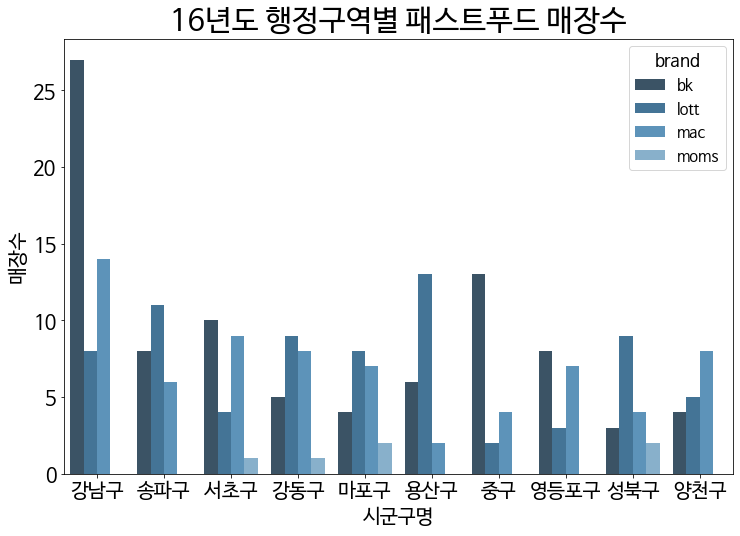

In [95]:
# barplot
# 다른 브랜드들과 비교 

# plot 사이즈 조절
plt.figure(figsize=(12,8)) # 차트 사이즈
plt.rc('legend', fontsize=15) # 범례 사이즈
plt.rc('axes', labelsize=20) # 축 제목
plt.rc('font', size=20) # x,y 축 값
# plt.xticks(fontsize=20, rotation=0) # x축 값

sns.barplot(data = df_gu_top10_16,
           x = df_gu_top10_16.index,
           y = '매장수',
           hue = 'brand',
           palette="Blues_d"
           )

plt.title("16년도 행정구역별 패스트푸드 매장수", fontsize=30)
plt.show()

**=> 강남구의 매장 수가 제일 많고, 상대적으로 버거킹 매장수가 많은 것을 볼 수 있습니다. 용산구에서는 롯데리아 매장이 많지만 맥도날드 매장도 조금 증가한 것을 볼 수 있습니다. 전반적인 지역에서 맥도날드와 맘스터치 매장 수도 늘어났습니다.**

***
#### **15년도 대비 16년도의 행정구역별 패스트푸드 매장 수 증감 계산**

**(참고)**
- [python df sub](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sub.html)

In [96]:
# 연도별 매장 수 증감 계산

df_last_y = pd.DataFrame(df_fastfood[df_fastfood["year"]=='2015'].groupby(by=['시군구명','brand'])['brand'].count())
df_this_y = pd.DataFrame(df_fastfood[df_fastfood["year"]=='2016'].groupby(by=['시군구명','brand'])['brand'].count())

# 데이터프레임 간 계산 (-)
df_diff = df_this_y.sub(df_last_y)

# 시군구명 + brand 인덱스가 맞지 않을 경우 Null값 발생
df_diff_idx = df_diff[df_diff.isnull().any(axis=1)].index

# for문
for idx in df_diff_idx:
    
    # df_this_y 에 있는 값일 경우 (+기호)
    if idx in df_this_y.index:
        value = df_this_y.loc[idx]        
    
    # df_last_y 에 있는 값일 경우 (-기호)
    elif idx in df_last_y.index:
        value = - df_last_y.loc[idx]
    
    # null값이 있는 인덱스를 찾아 적합한 값을 채워줍니다.
    df_diff.loc[idx] = value

# 인덱스 재설정
df_diff.columns = ['매장수증감']
df_diff.reset_index(level=["brand"], inplace=True)
df_diff

brand  매장수증감
시군구명             
강남구     bk    1.0
강남구   lott   -2.0
강남구    mac    6.0
강동구     bk    0.0
강동구   lott    0.0
...    ...    ...
중구    lott   -9.0
중구     mac    3.0
중랑구     bk    0.0
중랑구   lott   -1.0
중랑구    mac    2.0

[83 rows x 2 columns]

In [97]:
# 16년도에서 매장수가 높았던 구 10개 선정

df_diff_top10_16 = df_diff.loc[geo_gu_16['구'][:10],:]
df_diff_top10_16

brand  매장수증감
시군구명             
강남구     bk    1.0
강남구   lott   -2.0
강남구    mac    6.0
송파구     bk    1.0
송파구   lott    2.0
송파구    mac    4.0
서초구     bk    2.0
서초구   lott   -2.0
서초구    mac    5.0
서초구   moms    1.0
강동구     bk    0.0
강동구   lott    0.0
강동구    mac    5.0
강동구   moms    0.0
마포구     bk    3.0
마포구   lott   -4.0
마포구    mac    4.0
마포구   moms    2.0
용산구     bk    2.0
용산구   lott    3.0
용산구    mac    2.0
중구      bk    5.0
중구    lott   -9.0
중구     mac    3.0
영등포구    bk    3.0
영등포구  lott   -3.0
영등포구   mac    2.0
성북구     bk    1.0
성북구   lott    4.0
성북구    mac    3.0
성북구   moms    1.0
양천구     bk   -1.0
양천구   lott    1.0
양천구    mac    7.0

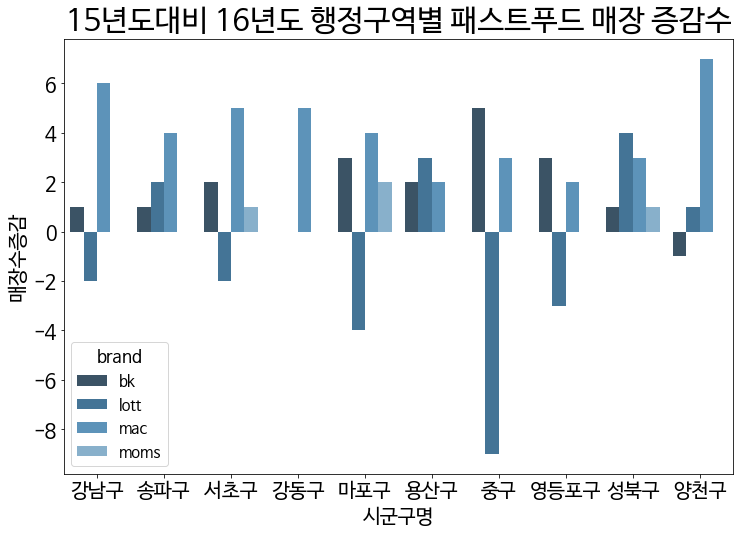

In [98]:
# barplot
# 행정구역별 증감

# plot 사이즈 조절
plt.figure(figsize=(12,8)) # 차트 사이즈
plt.rc('legend', fontsize=15) # 범례 사이즈
plt.rc('axes', labelsize=20) # 축 제목
plt.rc('font', size=20) # x,y 축 값
# plt.xticks(fontsize=20, rotation=0) # x축 값

sns.barplot(data = df_diff_top10_16,
           x = df_diff_top10_16.index,
           y = '매장수증감',
           hue = 'brand',
#            color = 'salmon'
           palette="Blues_d"
           )

plt.title("15년도대비 16년도 행정구역별 패스트푸드 매장 증감수", fontsize=30)
plt.show()

**=> 강남, 송파, 서초, 강동, 양천구 등에서 맥도날드 매장 수가 크게 증가했고, 중구에서는 버거킹 매장이 크게 증가했습니다. 반면, 중구에서는 롯데리아 매장이 크게 감소했습니다.**

#### **2017년도**

In [99]:
# 2017년도 행정구역별 패스트푸드 매장수

geo_gu_17 = pd.DataFrame(df_fastfood[df_fastfood['year']=='2017']['시군구명'].value_counts())
geo_gu_17 = geo_gu_17.reset_index()
geo_gu_17.columns = ['구', '매장수']
geo_gu_17.head()

구  매장수
0   강남구   39
1   송파구   24
2   강동구   22
3   서초구   20
4  영등포구   19

In [100]:
# folium.CircleMaker

# 사용할 데이터
df_geo = df_fastfood

# 지도를 처음 열어줄 때, 어디를 중심으로 보여줄지 설정합니다.
# 위도와 경도의 평균값을 중심점으로 잡습니다.
# zoom_start는 처음 지도의 크기를 뜻합니다.
map = folium.Map(location=[df_geo['위도'].mean(),df_geo['경도'].mean()],
                           zoom_start=12)

# choropleth map
map.choropleth(geo_data = geo_json,
               data = geo_gu_17,
               columns = ['구', '매장수'],
               key_on = 'feature.properties.name',
               fill_color = 'GnBu',               
               fill_opacity=0.5,
               line_opacity=0.7,
               highlight=True)

# 지도 시각화
for g in df_geo.index:
    
    if (df_geo.loc[g, 'brand'] == 'mac') & (df_geo.loc[g, 'year'] == '2017'):
        icon_color = 'red'
                
    elif (df_geo.loc[g, 'brand'] == 'bk') & (df_geo.loc[g, 'year'] == '2017'):
        icon_color = 'blue'
    
    elif (df_geo.loc[g, 'brand'] == 'lott') & (df_geo.loc[g, 'year'] == '2017'):
        icon_color = 'lightgreen'
    
    elif (df_geo.loc[g, 'brand'] == 'moms') & (df_geo.loc[g, 'year'] == '2017'):
        icon_color = 'orange'
        
      
    folium.CircleMarker(
        location=[df_geo.loc[g,'위도'], df_geo.loc[g, '경도']],
        radius=1.2,
        color= icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)

# map.save(./map2.html')
map

Output hidden; open in https://colab.research.google.com to view.

In [101]:
# 행정구역별 브랜드 매장 수
df_fastfood_gu_17 = pd.DataFrame(df_fastfood[df_fastfood["year"]=='2017'].groupby(by=['시군구명','brand'])['brand'].count())
df_fastfood_gu_17.columns = ['매장수']
df_fastfood_gu_17.sort_values(by='매장수')
df_fastfood_gu_17.reset_index(level=["brand"], inplace=True)

# 행정구역별 패스트푸드 매장수 상위 10개 구
df_gu_top10_17 = df_fastfood_gu_17.loc[geo_gu_17['구'][:10], :]
df_gu_top10_17

brand  매장수
시군구명           
강남구     bk   21
강남구   lott    5
강남구    mac   12
강남구   moms    1
송파구     bk    6
송파구   lott   11
송파구    mac    7
강동구     bk    5
강동구   lott    8
강동구    mac    8
강동구   moms    1
서초구     bk    8
서초구   lott    4
서초구    mac    8
영등포구    bk    7
영등포구  lott    7
영등포구   mac    5
성북구     bk    4
성북구   lott    9
성북구    mac    4
성북구   moms    2
서대문구    bk    6
서대문구  lott    7
서대문구   mac    3
서대문구  moms    2
중구      bk   12
중구    lott    3
중구     mac    3
마포구     bk    5
마포구   lott    6
마포구    mac    5
마포구   moms    2
양천구     bk    4
양천구   lott    4
양천구    mac    7
양천구   moms    2

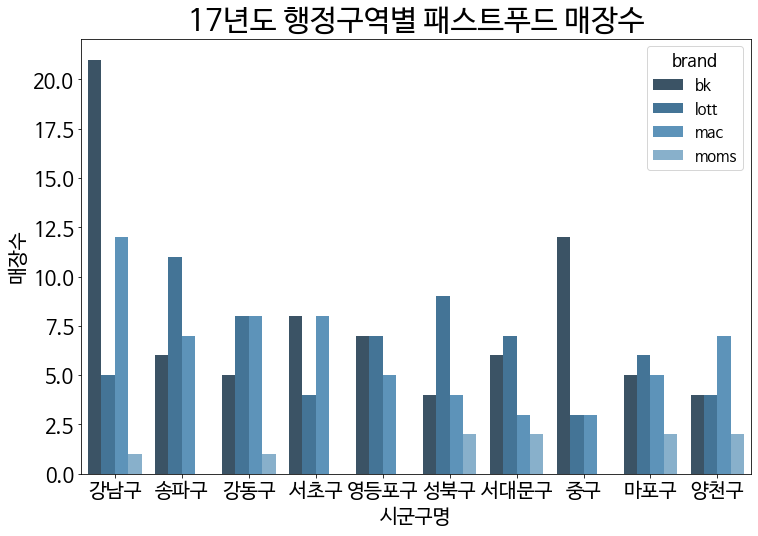

In [102]:
# barplot
# 다른 브랜드들과 비교 

# plot 사이즈 조절
plt.figure(figsize=(12,8)) # 차트 사이즈
plt.rc('legend', fontsize=15) # 범례 사이즈
plt.rc('axes', labelsize=20) # 축 제목
plt.rc('font', size=20) # x,y 축 값
# plt.xticks(fontsize=20, rotation=0) # x축 값

sns.barplot(data = df_gu_top10_17,
           x = df_gu_top10_17.index,
           y = '매장수',
           hue = 'brand',
           palette="Blues_d"
           )

plt.title("17년도 행정구역별 패스트푸드 매장수", fontsize=30)
plt.show()

**=> 17년도에도 역시 강남구가 제일 많은 매장 수를 보이고 있고, 상대적으로 버거킹 매장이 많이 분포해있음을 알 수 있습니다.**

In [103]:
# 연도별 매장 수 증감 계산

df_last_y = pd.DataFrame(df_fastfood[df_fastfood["year"]=='2016'].groupby(by=['시군구명','brand'])['brand'].count())
df_this_y = pd.DataFrame(df_fastfood[df_fastfood["year"]=='2017'].groupby(by=['시군구명','brand'])['brand'].count())

# 데이터프레임 간 계산 (-)
df_diff = df_this_y.sub(df_last_y)

# 시군구명 + brand 인덱스가 맞지 않을 경우 Null값 발생
df_diff_idx = df_diff[df_diff.isnull().any(axis=1)].index

# for문
for idx in df_diff_idx:
    
    # df_this_y 에 있는 값일 경우 (+기호)
    if idx in df_this_y.index:
        value = df_this_y.loc[idx]        
    
    # df_last_y 에 있는 값일 경우 (-기호)
    elif idx in df_last_y.index:
        value = - df_last_y.loc[idx]
    
    # null값이 있는 인덱스를 찾아 적합한 값을 채워줍니다.
    df_diff.loc[idx] = value

# 인덱스 재설정
df_diff.columns = ['매장수증감']
df_diff.reset_index(level=["brand"], inplace=True)

# 행정구역 10개만
df_diff_top10_17 = df_diff.loc[geo_gu_17['구'][:10],:]
df_diff_top10_17

brand  매장수증감
시군구명             
강남구     bk   -6.0
강남구   lott   -3.0
강남구    mac   -2.0
강남구   moms    1.0
송파구     bk   -2.0
송파구   lott    0.0
송파구    mac    1.0
강동구     bk    0.0
강동구   lott   -1.0
강동구    mac    0.0
강동구   moms    0.0
서초구     bk   -2.0
서초구   lott    0.0
서초구    mac   -1.0
서초구   moms   -1.0
영등포구    bk   -1.0
영등포구  lott    4.0
영등포구   mac   -2.0
성북구     bk    1.0
성북구   lott    0.0
성북구    mac    0.0
성북구   moms    0.0
서대문구    bk    1.0
서대문구  lott    3.0
서대문구   mac    0.0
서대문구  moms    1.0
중구      bk   -1.0
중구    lott    1.0
중구     mac   -1.0
마포구     bk    1.0
마포구   lott   -2.0
마포구    mac   -2.0
마포구   moms    0.0
양천구     bk    0.0
양천구   lott   -1.0
양천구    mac   -1.0
양천구   moms    2.0

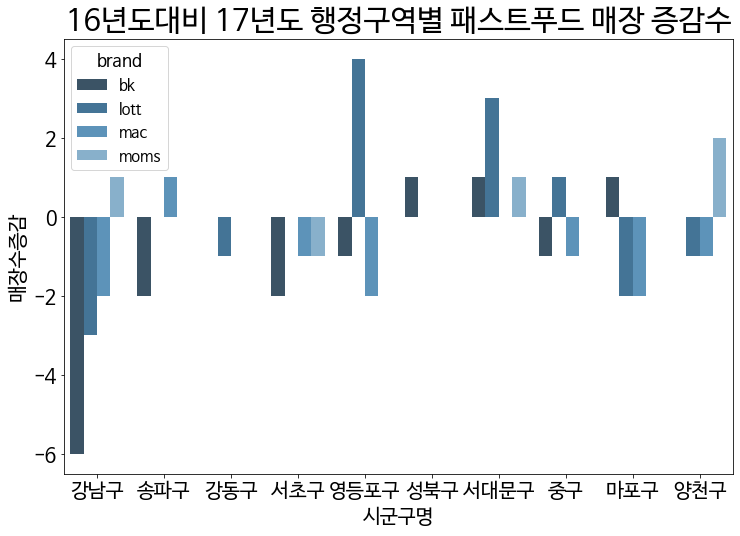

In [104]:
# barplot
# 행정구역별 증감

# plot 사이즈 조절
plt.figure(figsize=(12,8)) # 차트 사이즈
plt.rc('legend', fontsize=15) # 범례 사이즈
plt.rc('axes', labelsize=20) # 축 제목
plt.rc('font', size=20) # x,y 축 값
# plt.xticks(fontsize=20, rotation=0) # x축 값

sns.barplot(data = df_diff_top10_17,
           x = df_diff_top10_17.index,
           y = '매장수증감',
           hue = 'brand',
#            color = 'salmon'
           palette="Blues_d"
           )

plt.title("16년도대비 17년도 행정구역별 패스트푸드 매장 증감수", fontsize=30)
plt.show()

**=> 버거킹의 경우, 강남, 송파, 서초, 영등포와 중구에서 감소했고, 맥도날드의 경우, 강남과 마포에서 많이 감소했습니다. 강남구의 경우, 버거킹, 롯데리아, 맥도날드 매장 모두 감소했지만, 반대로 맘스터치 매장은 증가한 것을 확인할 수 있습니다.**

#### **2018년도**

In [105]:
# 2018년도 행정구역별 패스트푸드 매장수

geo_gu_18 = pd.DataFrame(df_fastfood[df_fastfood['year']=='2018']['시군구명'].value_counts())
geo_gu_18 = geo_gu_18.reset_index()
geo_gu_18.columns = ['구', '매장수']
geo_gu_18.head()

구  매장수
0   강남구   34
1   송파구   26
2   성북구   21
3  서대문구   20
4   강동구   20

In [106]:
# folium.CircleMaker

# 사용할 데이터
df_geo = df_fastfood

# 지도를 처음 열어줄 때, 어디를 중심으로 보여줄지 설정합니다.
# 위도와 경도의 평균값을 중심점으로 잡습니다.
# zoom_start는 처음 지도의 크기를 뜻합니다.
map = folium.Map(location=[df_geo['위도'].mean(),df_geo['경도'].mean()],
                           zoom_start=12)

# choropleth map
map.choropleth(geo_data = geo_json,
               data = geo_gu_18,
               columns = ['구', '매장수'],
               key_on = 'feature.properties.name',
               fill_color = 'GnBu',               
               fill_opacity=0.5,
               line_opacity=0.7,
               highlight=True)

# 지도 시각화
for g in df_geo.index:
    
    if (df_geo.loc[g, 'brand'] == 'mac') & (df_geo.loc[g, 'year'] == '2018'):
        icon_color = 'red'
                
    elif (df_geo.loc[g, 'brand'] == 'bk') & (df_geo.loc[g, 'year'] == '2018'):
        icon_color = 'blue'
    
    elif (df_geo.loc[g, 'brand'] == 'lott') & (df_geo.loc[g, 'year'] == '2018'):
        icon_color = 'lightgreen'
    
    elif (df_geo.loc[g, 'brand'] == 'moms') & (df_geo.loc[g, 'year'] == '2018'):
        icon_color = 'orange'
        
      
    folium.CircleMarker(
        location=[df_geo.loc[g,'위도'], df_geo.loc[g, '경도']],
        radius=1.2,
        color= icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)

# map.save(./map2.html')
map

Output hidden; open in https://colab.research.google.com to view.

In [107]:
# 행정구역별 브랜드 매장 수
df_fastfood_gu_18 = pd.DataFrame(df_fastfood[df_fastfood["year"]=='2018'].groupby(by=['시군구명','brand'])['brand'].count())
df_fastfood_gu_18.columns = ['매장수']
df_fastfood_gu_18.sort_values(by='매장수')
df_fastfood_gu_18.reset_index(level=["brand"], inplace=True)

# 행정구역별 패스트푸드 매장수 상위 10개 구
df_gu_top10_18 = df_fastfood_gu_18.loc[geo_gu_18['구'][:10], :]
df_gu_top10_18

brand  매장수
시군구명           
강남구     bk   18
강남구   lott    5
강남구    mac   10
강남구   moms    1
송파구     bk    5
송파구   lott   13
송파구    mac    7
송파구   moms    1
성북구     bk    5
성북구   lott    9
성북구    mac    3
성북구   moms    4
서대문구    bk    7
서대문구  lott    8
서대문구   mac    3
서대문구  moms    2
강동구     bk    5
강동구   lott    7
강동구    mac    6
강동구   moms    2
마포구     bk    6
마포구   lott    6
마포구    mac    5
마포구   moms    3
서초구     bk    7
서초구   lott    4
서초구    mac    9
성동구     bk    2
성동구   lott    8
성동구    mac    3
성동구   moms    5
양천구     bk    5
양천구   lott    4
양천구    mac    7
양천구   moms    2
중구      bk   12
중구    lott    3
중구     mac    3

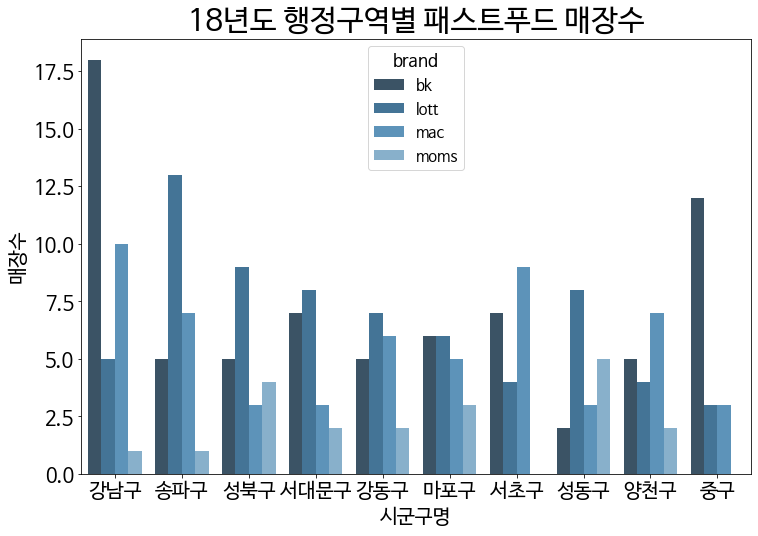

In [108]:
# barplot
# 다른 브랜드들과 비교 

# plot 사이즈 조절
plt.figure(figsize=(12,8)) # 차트 사이즈
plt.rc('legend', fontsize=15) # 범례 사이즈
plt.rc('axes', labelsize=20) # 축 제목
plt.rc('font', size=20) # x,y 축 값
# plt.xticks(fontsize=20, rotation=0) # x축 값

sns.barplot(data = df_gu_top10_18,
           x = df_gu_top10_18.index,
           y = '매장수',
           hue = 'brand',
           palette="Blues_d"
           )

plt.title("18년도 행정구역별 패스트푸드 매장수", fontsize=30)
plt.show()

**=> 17년도에 많이 감소했음에도 불구하고, 18년도에도 역시 강남구가 제일 많은 매장 수를 보이고 있고, 아직까진 상대적으로 버거킹 매장이 많이 분포해있음을 알 수 있습니다.**

In [109]:
# 연도별 매장 수 증감 계산

df_last_y = pd.DataFrame(df_fastfood[df_fastfood["year"]=='2017'].groupby(by=['시군구명','brand'])['brand'].count())
df_this_y = pd.DataFrame(df_fastfood[df_fastfood["year"]=='2018'].groupby(by=['시군구명','brand'])['brand'].count())

# 데이터프레임 간 계산 (-)
df_diff = df_this_y.sub(df_last_y)

# 시군구명 + brand 인덱스가 맞지 않을 경우 Null값 발생
df_diff_idx = df_diff[df_diff.isnull().any(axis=1)].index

# for문
for idx in df_diff_idx:
    
    # df_this_y 에 있는 값일 경우 (+기호)
    if idx in df_this_y.index:
        value = df_this_y.loc[idx]        
    
    # df_last_y 에 있는 값일 경우 (-기호)
    elif idx in df_last_y.index:
        value = - df_last_y.loc[idx]
    
    # null값이 있는 인덱스를 찾아 적합한 값을 채워줍니다.
    df_diff.loc[idx] = value

# 인덱스 재설정
df_diff.columns = ['매장수증감']
df_diff.reset_index(level=["brand"], inplace=True)

# 행정구역 10개만
df_diff_top10_18 = df_diff.loc[geo_gu_18['구'][:10],:]
df_diff_top10_18

brand  매장수증감
시군구명             
강남구     bk   -3.0
강남구   lott    0.0
강남구    mac   -2.0
강남구   moms    0.0
송파구     bk   -1.0
송파구   lott    2.0
송파구    mac    0.0
송파구   moms    1.0
성북구     bk    1.0
성북구   lott    0.0
성북구    mac   -1.0
성북구   moms    2.0
서대문구    bk    1.0
서대문구  lott    1.0
서대문구   mac    0.0
서대문구  moms    0.0
강동구     bk    0.0
강동구   lott   -1.0
강동구    mac   -2.0
강동구   moms    1.0
마포구     bk    1.0
마포구   lott    0.0
마포구    mac    0.0
마포구   moms    1.0
서초구     bk   -1.0
서초구   lott    0.0
서초구    mac    1.0
성동구     bk    2.0
성동구   lott    0.0
성동구    mac    0.0
성동구   moms    0.0
양천구     bk    1.0
양천구   lott    0.0
양천구    mac    0.0
양천구   moms    0.0
중구      bk    0.0
중구    lott    0.0
중구     mac    0.0

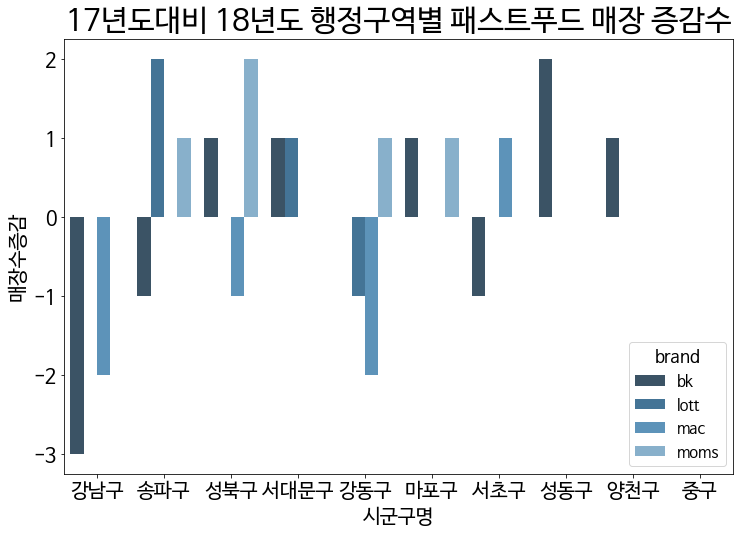

In [110]:
# barplot
# 행정구역별 증감

# plot 사이즈 조절
plt.figure(figsize=(12,8)) # 차트 사이즈
plt.rc('legend', fontsize=15) # 범례 사이즈
plt.rc('axes', labelsize=20) # 축 제목
plt.rc('font', size=20) # x,y 축 값
# plt.xticks(fontsize=20, rotation=0) # x축 값

sns.barplot(data = df_diff_top10_18,
           x = df_diff_top10_18.index,
           y = '매장수증감',
           hue = 'brand',
#            color = 'salmon'
           palette="Blues_d"
           )

plt.title("17년도대비 18년도 행정구역별 패스트푸드 매장 증감수", fontsize=30)
plt.show()

**=> 강남구에선 여전히 버거킹과 맥도날드 매장 수가 감소한 반면, 성동구에선 버거킹 매장이 증가했습니다. 송파에서는 롯데리아의 매장 수가 증가했고, 성북구에선 맘스터치 매장이 증가했습니다.**

#### **2019년도**

In [111]:
# 2019년도 행정구역별 패스트푸드 매장수

geo_gu_19 = pd.DataFrame(df_fastfood[df_fastfood['year']=='2019']['시군구명'].value_counts())
geo_gu_19 = geo_gu_19.reset_index()
geo_gu_19.columns = ['구', '매장수']
geo_gu_19.head()

구  매장수
0   강남구   48
1   서초구   27
2   강서구   27
3  서대문구   26
4   송파구   26

In [112]:
# folium.CircleMaker

# 사용할 데이터
df_geo = df_fastfood

# 지도를 처음 열어줄 때, 어디를 중심으로 보여줄지 설정합니다.
# 위도와 경도의 평균값을 중심점으로 잡습니다.
# zoom_start는 처음 지도의 크기를 뜻합니다.
map = folium.Map(location=[df_geo['위도'].mean(),df_geo['경도'].mean()],
                           zoom_start=12)

# choropleth map
map.choropleth(geo_data = geo_json,
               data = geo_gu_19,
               columns = ['구', '매장수'],
               key_on = 'feature.properties.name',
               fill_color = 'GnBu',               
               fill_opacity=0.5,
               line_opacity=0.7,
               highlight=True)

# 지도 시각화
for g in df_geo.index:
    
    if (df_geo.loc[g, 'brand'] == 'mac') & (df_geo.loc[g, 'year'] == '2019'):
        icon_color = 'red'
                
    elif (df_geo.loc[g, 'brand'] == 'bk') & (df_geo.loc[g, 'year'] == '2019'):
        icon_color = 'blue'
    
    elif (df_geo.loc[g, 'brand'] == 'lott') & (df_geo.loc[g, 'year'] == '2019'):
        icon_color = 'lightgreen'
    
    elif (df_geo.loc[g, 'brand'] == 'moms') & (df_geo.loc[g, 'year'] == '2019'):
        icon_color = 'orange'
        
      
    folium.CircleMarker(
        location=[df_geo.loc[g,'위도'], df_geo.loc[g, '경도']],
        radius=1.2,
        color= icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)

# map.save(./map2.html')
map

Output hidden; open in https://colab.research.google.com to view.

In [113]:
# 행정구역별 브랜드 매장 수
df_fastfood_gu_19 = pd.DataFrame(df_fastfood[df_fastfood["year"]=='2019'].groupby(by=['시군구명','brand'])['brand'].count())
df_fastfood_gu_19.columns = ['매장수']
df_fastfood_gu_19.sort_values(by='매장수')
df_fastfood_gu_19.reset_index(level=["brand"], inplace=True)

# 행정구역별 패스트푸드 매장수 상위 10개 구
df_gu_top10_19 = df_fastfood_gu_19.loc[geo_gu_19['구'][:10], :]
df_gu_top10_19

brand  매장수
시군구명           
강남구     bk   26
강남구   lott    7
강남구    mac   14
강남구   moms    1
서초구     bk   11
서초구   lott    7
서초구    mac    9
강서구     bk    7
강서구   lott    9
강서구    mac    8
강서구   moms    3
서대문구    bk   10
서대문구  lott   10
서대문구   mac    4
서대문구  moms    2
송파구     bk    5
송파구   lott   13
송파구    mac    7
송파구   moms    1
중구      bk   14
중구    lott    6
중구     mac    4
마포구     bk    8
마포구   lott    7
마포구    mac    5
마포구   moms    3
성북구     bk    5
성북구   lott   11
성북구    mac    3
성북구   moms    4
광진구     bk    5
광진구   lott   10
광진구    mac    5
광진구   moms    2
동대문구    bk    5
동대문구  lott    8
동대문구   mac    6
동대문구  moms    3

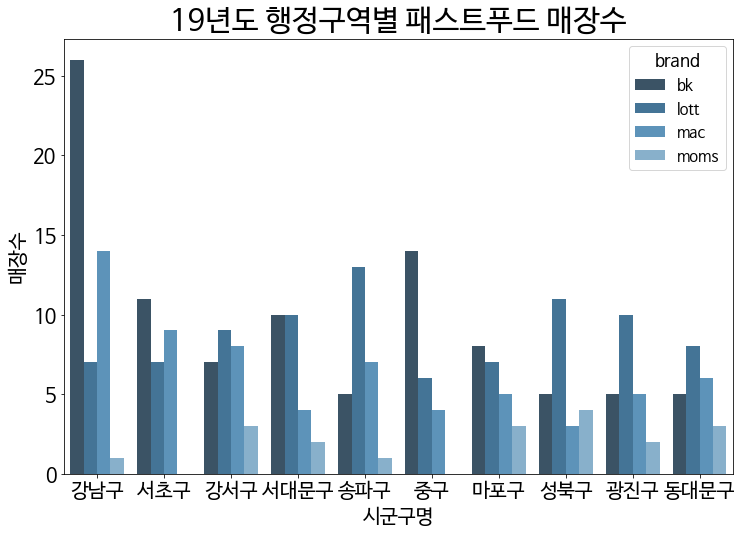

In [114]:
# barplot
# 다른 브랜드들과 비교 

# plot 사이즈 조절
plt.figure(figsize=(12,8)) # 차트 사이즈
plt.rc('legend', fontsize=15) # 범례 사이즈
plt.rc('axes', labelsize=20) # 축 제목
plt.rc('font', size=20) # x,y 축 값
# plt.xticks(fontsize=20, rotation=0) # x축 값

sns.barplot(data = df_gu_top10_19,
           x = df_gu_top10_19.index,
           y = '매장수',
           hue = 'brand',
           palette="Blues_d"
           )

plt.title("19년도 행정구역별 패스트푸드 매장수", fontsize=30)
plt.show()

**=> 19년도에도 여전히 강남구에 햄버거 매장들이 가장 많이 분포해있고, 강남구에선 맥도날드 매장 수가 롯데리아 매장보다 더 많이 분포해있음을 알 수 있습니다.**

In [115]:
# 연도별 매장 수 증감 계산

df_last_y = pd.DataFrame(df_fastfood[df_fastfood["year"]=='2018'].groupby(by=['시군구명','brand'])['brand'].count())
df_this_y = pd.DataFrame(df_fastfood[df_fastfood["year"]=='2019'].groupby(by=['시군구명','brand'])['brand'].count())

# 데이터프레임 간 계산 (-)
df_diff = df_this_y.sub(df_last_y)

# 시군구명 + brand 인덱스가 맞지 않을 경우 Null값 발생
df_diff_idx = df_diff[df_diff.isnull().any(axis=1)].index

# for문
for idx in df_diff_idx:
    
    # df_this_y 에 있는 값일 경우 (+기호)
    if idx in df_this_y.index:
        value = df_this_y.loc[idx]        
    
    # df_last_y 에 있는 값일 경우 (-기호)
    elif idx in df_last_y.index:
        value = - df_last_y.loc[idx]
    
    # null값이 있는 인덱스를 찾아 적합한 값을 채워줍니다.
    df_diff.loc[idx] = value

# 인덱스 재설정
df_diff.columns = ['매장수증감']
df_diff.reset_index(level=["brand"], inplace=True)

# 행정구역 10개만
df_diff_top10_19 = df_diff.loc[geo_gu_19['구'][:10],:]
df_diff_top10_19

brand  매장수증감
시군구명             
강남구     bk      8
강남구   lott      2
강남구    mac      4
강남구   moms      0
서초구     bk      4
서초구   lott      3
서초구    mac      0
강서구     bk      4
강서구   lott      4
강서구    mac      2
강서구   moms      0
서대문구    bk      3
서대문구  lott      2
서대문구   mac      1
서대문구  moms      0
송파구     bk      0
송파구   lott      0
송파구    mac      0
송파구   moms      0
중구      bk      2
중구    lott      3
중구     mac      1
마포구     bk      2
마포구   lott      1
마포구    mac      0
마포구   moms      0
성북구     bk      0
성북구   lott      2
성북구    mac      0
성북구   moms      0
광진구     bk      0
광진구   lott      4
광진구    mac      2
광진구   moms      0
동대문구    bk      3
동대문구  lott      2
동대문구   mac      2
동대문구  moms      0

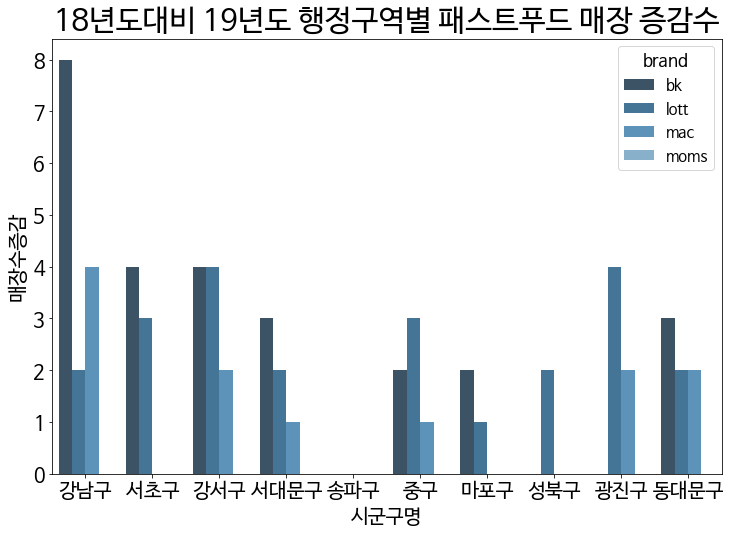

In [116]:
# barplot
# 행정구역별 증감

# plot 사이즈 조절
plt.figure(figsize=(12,8)) # 차트 사이즈
plt.rc('legend', fontsize=15) # 범례 사이즈
plt.rc('axes', labelsize=20) # 축 제목
plt.rc('font', size=20) # x,y 축 값
# plt.xticks(fontsize=20, rotation=0) # x축 값

sns.barplot(data = df_diff_top10_19,
           x = df_diff_top10_19.index,
           y = '매장수증감',
           hue = 'brand',
#            color = 'salmon'
           palette="Blues_d"
           )

plt.title("18년도대비 19년도 행정구역별 패스트푸드 매장 증감수", fontsize=30)
plt.show()

**=> 19년도는 작년 대비 감소한 브랜드가 없으며, 버거킹의 경우, 강남, 강서, 서초 등에서 다시 증가했음을 확인할 수 있습니다. 맥도날드 매장 역시 강남과 강서, 동대문구에서 증가했으며, 10개의 행정구역에선 맘스터치는 증가한 구는 없음을 확인할 수 있습니다.**

**=> 질문 3. "패스트푸드 매장은 어느 지역에 많이 분포할까?"에 대한 답은 15년도부터 19년 5년동안 서울에서는 강남구에 가장 많이 분포해 있으며, 4개의 브랜드 중 강남구에는 버거킹 매장이 가장 많이 분포해있습니다.**

In [117]:
# 연도별 매장수 상위 10개의 행정구역의 변화를 표로 만들어봅니다.

# 먼저, 빈 데이터프레임을 만들어주고, 원하는 칼럼명을 지정해줍니다.
df_top10 = pd.DataFrame(columns=['2015','2016','2017','2018','2019'])

# 각 칼럼에 맞게 값을 넣어줍니다.
df_top10.loc[:,'2015'] = geo_gu_15['구'][:10].values
df_top10.loc[:,'2016'] = geo_gu_16['구'][:10].values
df_top10.loc[:,'2017'] = geo_gu_17['구'][:10].values
df_top10.loc[:,'2018'] = geo_gu_18['구'][:10].values
df_top10.loc[:,'2019'] = geo_gu_19['구'][:10].values

# 출력해봅니다.
df_top10

2015  2016  2017  2018  2019
0   강남구   강남구   강남구   강남구   강남구
1    중구   송파구   송파구   송파구   서초구
2   송파구   서초구   강동구   성북구   강서구
3   강동구   강동구   서초구  서대문구  서대문구
4   서초구   마포구  영등포구   강동구   송파구
5   관악구   용산구   성북구   마포구    중구
6  영등포구    중구  서대문구   서초구   마포구
7   마포구  영등포구    중구   성동구   성북구
8   용산구   성북구   마포구   양천구   광진구
9  서대문구   양천구   양천구    중구  동대문구

In [0]:
# 데이터프레임 저장하기

df_top10.to_csv(dir + 'df_top10.csv')

***
#### **Wrap up**  
- 같이 확인해볼 질문 및 공공데이터셋 소개
- 활용할 라이브러리 로드하고 데이터셋 탐색하기
- 원하는 폴더 내 데이터를 한번에 로드하기 (glob)
- 결측치 확인 및 시각화 (seaborn heatmap/ missingno)
- 결측치 처리 (fillna/ dropna/ dataframe.any())
- 지리정보(위도, 경도)를 이용해 지도 시각화 (matplotlib/ seaborn/ plotnine)
- 데이터셋 정제 및 결합하기
- 데이터 시각화 (barplot/ lineplot)
- folium 을 통해 패스트푸드 매장 분포 확인하기
- Choropleth map 을 통해 행정구역 구분하기
- 연도별 브랜드 매장수 비교하기
- 브랜드별 매장수 증감 확인하기

***
#### **참고할만한 사이트**  
**시각화**
- [Folium Quickstart](https://python-visualization.github.io/folium/quickstart.html#Choropleth-maps)
- [Seaborn을 사용한 데이터 분포 시각화](https://datascienceschool.net/view-notebook/4c2d5ff1caab4b21a708cc662137bc65/)
- [주피터 노트북 마크다운](https://hashcode.co.kr/questions/1772/%EB%A7%88%ED%81%AC%EB%8B%A4%EC%9A%B4-%EB%AC%B8%EB%B2%95-%EC%9E%91%EC%84%B1-%ED%8C%81)
- [Python Graph Gallery](https://python-graph-gallery.com/)

**데이터소스**
- [공공데이터포털](https://www.data.go.kr/)
- [서울열린데이터광장](https://data.seoul.go.kr/)
- [빅데이터캠퍼스](https://bigdata.seoul.go.kr/main.do)
- [KB경영연구소](https://www.kbfg.com/kbresearch/report/reportView.do?reportId=1003860)